In [181]:

from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
1,b7dfe3e1-93ab-45e8-b0ac-a12da84dfb34,sparse_recovery,Transformer,N=50_Phi=normal_d=20_sparsity=3_tau=0,-1,-1,20,12,8,compressed_sensing
0,9b53465a-1a36-4ddd-89a2-224bb23fafee,matrix_factorization,Transformer,N=50_n1=20_n2=20_problem=matrix-completion_ran...,-1,-1,20,12,8,matrix_factorization


In [183]:
#task = "sparse_recovery"
task = "matrix_factorization"

run_id = "9b53465a-1a36-4ddd-89a2-224bb23fafee" 

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training


matrix_factorization 9b53465a-1a36-4ddd-89a2-224bb23fafee


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 25015.73it/s]


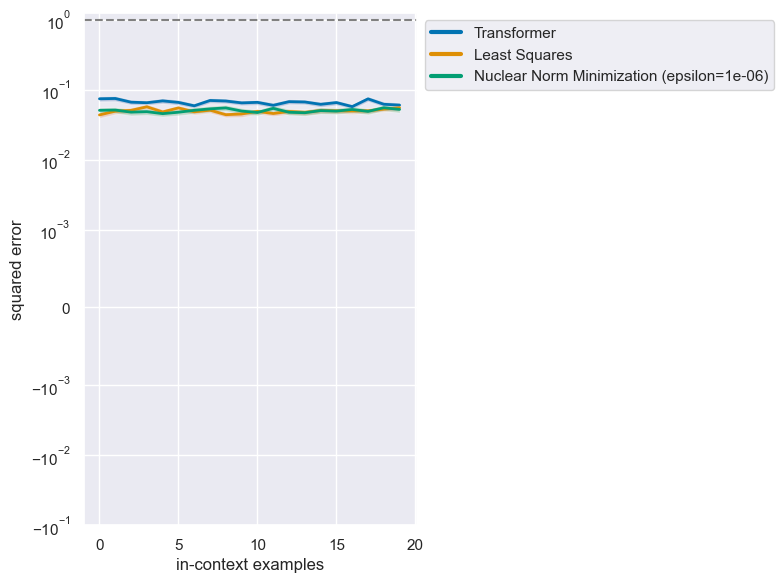

In [184]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)
plt.yscale("symlog", linthresh=1e-3)
plt.tight_layout()
plt.show()

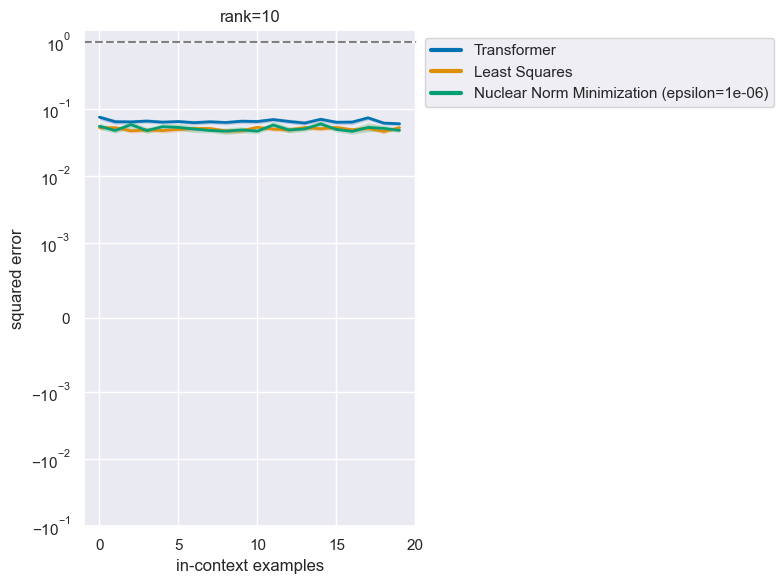

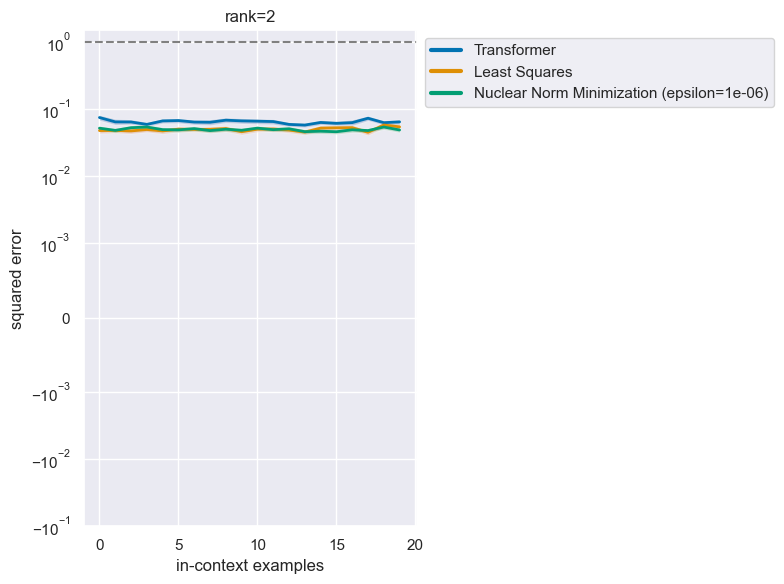

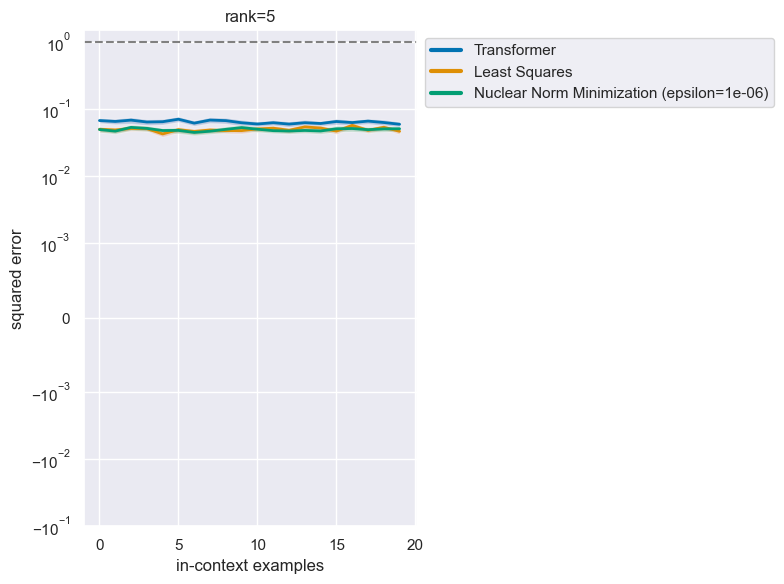

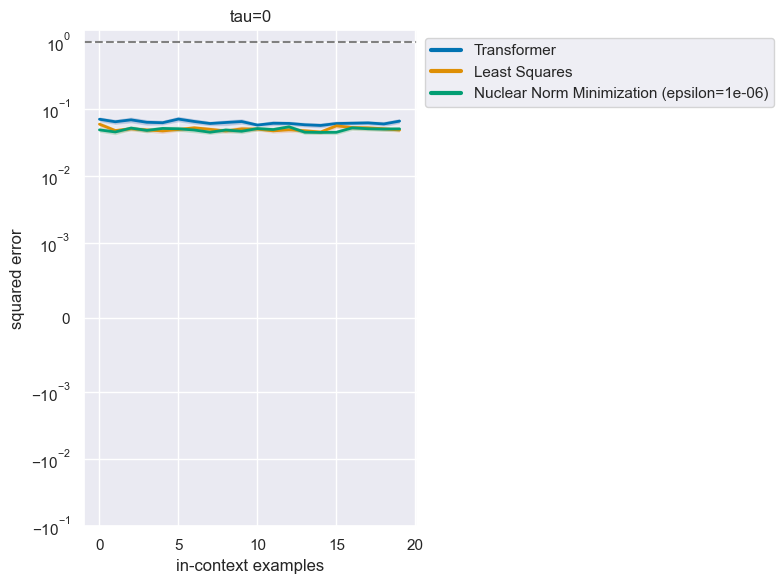

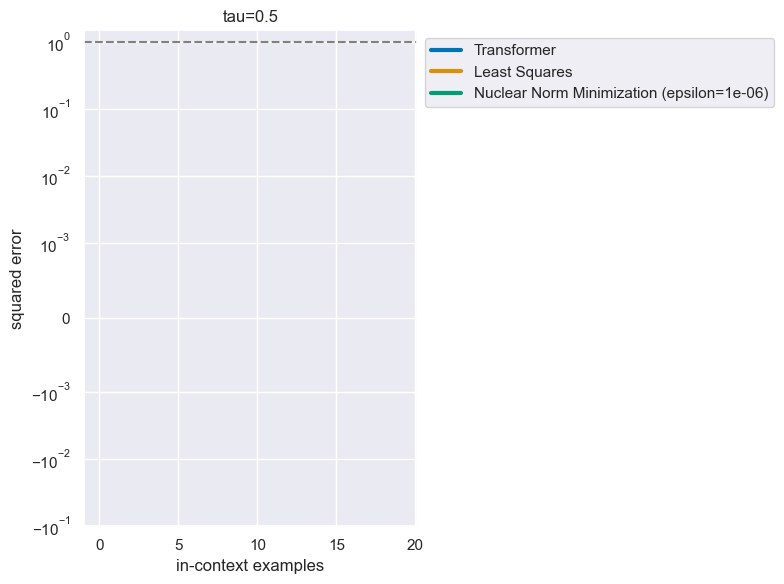

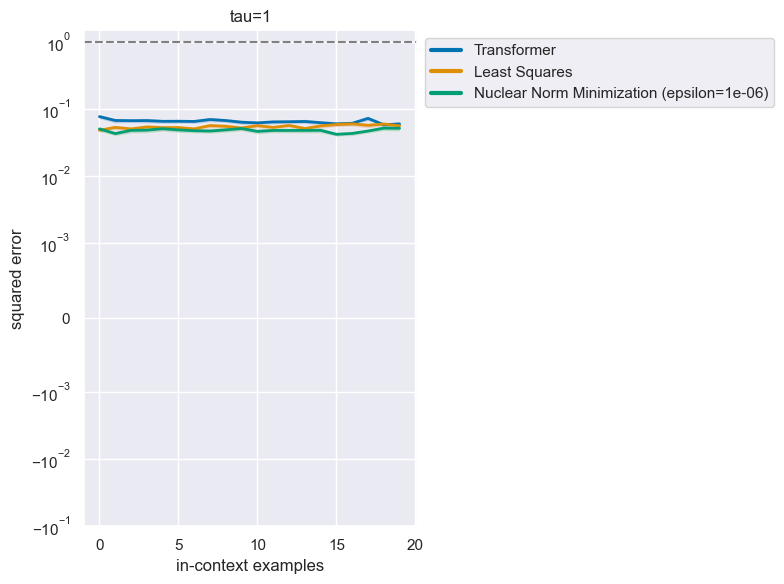

In [185]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)
    plt.yscale("symlog", linthresh=1e-3)
    plt.tight_layout()
    plt.show()


In [ ]:
{
  "standard": {
    "gpt2_embd=256_layer=12_head=8": {
      "mean": [
        1.479834794998169,
        1.4952856302261353,
        1.3239119052886963,
        1.3000301122665405,
        1.381673812866211,
        1.3142659664154053,
        1.1745201349258423,
        1.400427222251892,
        1.376020073890686,
        1.293757438659668,
        1.316881775856018,
        1.1933673620224,
        1.3470944166183472,
        1.3330669403076172,
        1.233290672302246,
        1.3074575662612915,
        1.1440508365631104,
        1.4769996404647827,
        1.2353589534759521,
        1.2024606466293335
      ],
      "std": [
        2.5274434089660645,
        2.708329439163208,
        2.1614511013031006,
        2.004732131958008,
        2.400437831878662,
        2.281013011932373,
        1.9972801208496094,
        2.391637086868286,
        2.2630186080932617,
        2.1135096549987793,
        2.292340040206909,
        2.206266164779663,
        2.290782928466797,
        2.130483388900757,
        2.2025961875915527,
        2.1878912448883057,
        1.9750431776046753,
        2.3158607482910156,
        2.144805431365967,
        1.9387129545211792
      ],
      "bootstrap_low": [
        1.364479422569275,
        1.3742992877960205,
        1.2250491380691528,
        1.2093619108200073,
        1.272596836090088,
        1.209612250328064,
        1.0841484069824219,
        1.2946910858154297,
        1.2749656438827515,
        1.197195053100586,
        1.2144997119903564,
        1.0984728336334229,
        1.2447429895401,
        1.2352015972137451,
        1.1344053745269775,
        1.2062357664108276,
        1.0582093000411987,
        1.3619552850723267,
        1.1368753910064697,
        1.1165415048599243
      ],
      "bootstrap_high": [
        1.6043331623077393,
        1.6188840866088867,
        1.4290542602539062,
        1.4002043008804321,
        1.5025193691253662,
        1.4264328479766846,
        1.2683080434799194,
        1.512739896774292,
        1.4866584539413452,
        1.3931995630264282,
        1.4179943799972534,
        1.3014105558395386,
        1.4575860500335693,
        1.4356067180633545,
        1.34010910987854,
        1.4071786403656006,
        1.233618140220642,
        1.5889171361923218,
        1.3445570468902588,
        1.2966903448104858
      ]
    },
    "OLS_driver=None": {
      "mean": [
        0.8703147172927856,
        0.9842036962509155,
        1.0120809078216553,
        1.1367489099502563,
        0.9601022601127625,
        1.0955668687820435,
        0.9643810391426086,
        1.016650915145874,
        0.8772197961807251,
        0.897720992565155,
        0.9800652265548706,
        0.9116946458816528,
        0.9757118225097656,
        0.9486745595932007,
        1.0046669244766235,
        0.9971948862075806,
        0.9914363622665405,
        0.9983010292053223,
        1.0526788234710693,
        1.1030067205429077
      ],
      "std": [
        1.699873685836792,
        1.8476201295852661,
        1.9031352996826172,
        2.116612672805786,
        1.8707386255264282,
        1.9464696645736694,
        1.8995311260223389,
        1.8816927671432495,
        1.6843689680099487,
        1.7257295846939087,
        1.880107045173645,
        1.6309480667114258,
        1.9307414293289185,
        1.826580286026001,
        1.9533603191375732,
        1.8094154596328735,
        1.9480010271072388,
        1.8176562786102295,
        1.992606520652771,
        2.1570916175842285
      ],
      "bootstrap_low": [
        0.7905194163322449,
        0.8959819078445435,
        0.9245110750198364,
        1.044651746749878,
        0.87261962890625,
        1.0061218738555908,
        0.8801539540290833,
        0.9301813840866089,
        0.8082068562507629,
        0.8154780268669128,
        0.8952697515487671,
        0.8423675298690796,
        0.8880382776260376,
        0.860696017742157,
        0.917026162147522,
        0.9128689765930176,
        0.8986474275588989,
        0.919770359992981,
        0.9688741564750671,
        1.010481834411621
      ],
      "bootstrap_high": [
        0.9470447301864624,
        1.071814775466919,
        1.1039892435073853,
        1.2382875680923462,
        1.0451133251190186,
        1.1867408752441406,
        1.0604612827301025,
        1.103906273841858,
        0.9565046429634094,
        0.9836320877075195,
        1.0626990795135498,
        0.9903672933578491,
        1.0632715225219727,
        1.0343250036239624,
        1.108053207397461,
        1.083019495010376,
        1.0823557376861572,
        1.081165075302124,
        1.147766351699829,
        1.1987634897232056
      ]
    },
    "nuclear_norm_minimization_epsilon=1e-06": {
      "mean": [
        1.0130605697631836,
        1.0214492082595825,
        0.9537941217422485,
        0.9688783884048462,
        0.9079574346542358,
        0.9513499140739441,
        1.0126274824142456,
        1.0624840259552002,
        1.0963693857192993,
        0.9885061383247375,
        0.9426074028015137,
        1.0799912214279175,
        0.9496669769287109,
        0.9356893301010132,
        1.004084587097168,
        0.9870281219482422,
        1.0418057441711426,
        0.9771791696548462,
        1.101843237876892,
        1.0432285070419312
      ],
      "std": [
        2.054144859313965,
        2.119664430618286,
        2.0065932273864746,
        1.982371211051941,
        1.7595984935760498,
        2.10689640045166,
        2.1678569316864014,
        2.3507931232452393,
        2.263240098953247,
        2.063406229019165,
        1.8014639616012573,
        2.3209283351898193,
        2.0917928218841553,
        1.8609720468521118,
        2.2304258346557617,
        1.9760894775390625,
        2.3529415130615234,
        1.9558273553848267,
        2.171588182449341,
        2.293058156967163
      ],
      "bootstrap_low": [
        0.9179491996765137,
        0.9252999424934387,
        0.857295036315918,
        0.8744474649429321,
        0.8267683982849121,
        0.8618186712265015,
        0.9120107889175415,
        0.9623826742172241,
        0.9957427978515625,
        0.8931211233139038,
        0.8602765202522278,
        0.9814473390579224,
        0.865489661693573,
        0.8500291705131531,
        0.9042045474052429,
        0.8953455686569214,
        0.9391857385635376,
        0.8872734308242798,
        1.0041148662567139,
        0.9399275779724121
      ],
      "bootstrap_high": [
        1.1023967266082764,
        1.1187680959701538,
        1.0507869720458984,
        1.066144347190857,
        0.9942671060562134,
        1.0505502223968506,
        1.1167826652526855,
        1.1664031744003296,
        1.207593560218811,
        1.0889289379119873,
        1.0284830331802368,
        1.1923863887786865,
        1.0527362823486328,
        1.0219415426254272,
        1.1158865690231323,
        1.0844552516937256,
        1.1582971811294556,
        1.0657680034637451,
        1.2026371955871582,
        1.1526395082473755
      ]
    },
    "lasso_alpha=1_max_iter=100000": {
      "mean": [
        0.974898636341095,
        1.0197795629501343,
        1.0618648529052734,
        1.0551551580429077,
        1.0303161144256592,
        0.9997949600219727,
        1.0884788036346436,
        0.958959698677063,
        0.9995695352554321,
        0.9631849527359009,
        1.0535387992858887,
        0.9685004949569702,
        1.0320994853973389,
        0.9837795495986938,
        1.056905746459961,
        0.9007902145385742,
        0.9592787623405457,
        0.9417101740837097,
        1.037219762802124,
        0.9365760087966919
      ],
      "std": [
        1.6696271896362305,
        1.7525871992111206,
        1.6852853298187256,
        1.7879576683044434,
        1.627530574798584,
        1.6273890733718872,
        1.7991104125976562,
        1.5337090492248535,
        1.572845220565796,
        1.6416994333267212,
        1.7939903736114502,
        1.5395817756652832,
        1.679663062095642,
        1.5311479568481445,
        1.7868597507476807,
        1.4319570064544678,
        1.6681597232818604,
        1.5493669509887695,
        1.7100391387939453,
        1.4822243452072144
      ],
      "bootstrap_low": [
        0.9000009298324585,
        0.9440887570381165,
        0.9850002527236938,
        0.9741182327270508,
        0.9544442892074585,
        0.9263310432434082,
        0.9992599487304688,
        0.888853907585144,
        0.9267129898071289,
        0.8878968954086304,
        0.972143828868866,
        0.8954681158065796,
        0.9613744616508484,
        0.9142807126045227,
        0.9775034785270691,
        0.8352327346801758,
        0.8844571113586426,
        0.8689813613891602,
        0.960479736328125,
        0.8663261532783508
      ],
      "bootstrap_high": [
        1.052260398864746,
        1.1055083274841309,
        1.1437679529190063,
        1.138671636581421,
        1.1025961637496948,
        1.0749744176864624,
        1.1670825481414795,
        1.0298054218292236,
        1.0739340782165527,
        1.0396217107772827,
        1.1415663957595825,
        1.0429757833480835,
        1.1130428314208984,
        1.0592310428619385,
        1.1450092792510986,
        0.9683685302734375,
        1.033413290977478,
        1.017225980758667,
        1.1217447519302368,
        1.0063459873199463
      ]
    },
    "lasso_alpha=0.1_max_iter=100000": {
      "mean": [
        1.0575776100158691,
        0.9192468523979187,
        1.0587927103042603,
        1.0621346235275269,
        0.9946931600570679,
        1.0678901672363281,
        1.0384172201156616,
        0.9819000959396362,
        1.0774816274642944,
        1.1100112199783325,
        0.9817482829093933,
        1.0379767417907715,
        1.0906407833099365,
        1.0646377801895142,
        1.051483392715454,
        0.9449129104614258,
        0.9800907373428345,
        1.0354379415512085,
        0.9982860684394836,
        1.0799974203109741
      ],
      "std": [
        2.045339584350586,
        1.7496559619903564,
        2.1920864582061768,
        1.9539231061935425,
        1.9500148296356201,
        2.018153429031372,
        1.9896434545516968,
        2.1312243938446045,
        2.2569475173950195,
        2.2374327182769775,
        1.9331470727920532,
        2.160043954849243,
        2.1627352237701416,
        2.2973556518554688,
        2.0289013385772705,
        1.9323548078536987,
        2.0184292793273926,
        2.127793312072754,
        1.826973557472229,
        2.204951047897339
      ],
      "bootstrap_low": [
        0.9689434170722961,
        0.8422545194625854,
        0.9561281204223633,
        0.9742185473442078,
        0.9054643511772156,
        0.97504061460495,
        0.9487982988357544,
        0.8875101804733276,
        0.9703333973884583,
        1.0155569314956665,
        0.8970516324043274,
        0.9475215077400208,
        0.9960082769393921,
        0.9679147005081177,
        0.9604998826980591,
        0.8543961644172668,
        0.8968927264213562,
        0.9404240846633911,
        0.9126262664794922,
        0.9770954847335815
      ],
      "bootstrap_high": [
        1.1449168920516968,
        1.0041686296463013,
        1.16291081905365,
        1.1578360795974731,
        1.086426019668579,
        1.161417841911316,
        1.1307017803192139,
        1.0903754234313965,
        1.184635877609253,
        1.2103787660598755,
        1.0750858783721924,
        1.1376813650131226,
        1.1925146579742432,
        1.1755465269088745,
        1.1502645015716553,
        1.0379712581634521,
        1.0709089040756226,
        1.138411521911621,
        1.084486961364746,
        1.1841905117034912
      ]
    },
    "lasso_alpha=0.01_max_iter=100000": {
      "mean": [
        1.0771369934082031,
        1.046971321105957,
        0.9741922616958618,
        1.0069589614868164,
        1.0970439910888672,
        1.102215051651001,
        1.163611650466919,
        1.121700644493103,
        1.2532808780670166,
        1.0186998844146729,
        1.1832354068756104,
        1.3255895376205444,
        1.1343001127243042,
        1.252429485321045,
        1.2146692276000977,
        1.1800130605697632,
        1.2998836040496826,
        1.2413995265960693,
        1.377166986465454,
        1.3460198640823364
      ],
      "std": [
        1.7266710996627808,
        1.7975194454193115,
        1.6491342782974243,
        1.802794098854065,
        1.7496421337127686,
        2.0423691272735596,
        2.043668031692505,
        2.3827128410339355,
        2.29764723777771,
        1.8090914487838745,
        1.9600093364715576,
        2.5185234546661377,
        2.038848876953125,
        2.3430473804473877,
        2.3720827102661133,
        2.1266255378723145,
        2.462124824523926,
        2.6194822788238525,
        2.603522777557373,
        2.459073066711426
      ],
      "bootstrap_low": [
        0.9961284399032593,
        0.9649001955986023,
        0.8964735269546509,
        0.9281193017959595,
        1.0233871936798096,
        1.0135915279388428,
        1.0683820247650146,
        1.0152599811553955,
        1.1510504484176636,
        0.9407609701156616,
        1.0972814559936523,
        1.215185284614563,
        1.037085771560669,
        1.1474460363388062,
        1.1102473735809326,
        1.0919827222824097,
        1.1930270195007324,
        1.1151983737945557,
        1.2630150318145752,
        1.232820749282837
      ],
      "bootstrap_high": [
        1.1579973697662354,
        1.1300359964370728,
        1.0508896112442017,
        1.0929182767868042,
        1.183912754058838,
        1.1902105808258057,
        1.260093331336975,
        1.2358118295669556,
        1.357037901878357,
        1.1052931547164917,
        1.2762634754180908,
        1.429949402809143,
        1.227141261100769,
        1.3640514612197876,
        1.3294179439544678,
        1.2817497253417969,
        1.414847731590271,
        1.376133680343628,
        1.5130500793457031,
        1.4685537815093994
      ]
    },
    "lasso_alpha=0.001_max_iter=100000": {
      "mean": [
        0.9825135469436646,
        1.0152772665023804,
        0.9046844244003296,
        1.116449236869812,
        1.1387426853179932,
        1.1670334339141846,
        1.1783850193023682,
        1.1637810468673706,
        1.2733876705169678,
        1.157849669456482,
        1.2061049938201904,
        1.1981098651885986,
        1.2480655908584595,
        1.355915904045105,
        1.3012125492095947,
        1.368986964225769,
        1.5107463598251343,
        1.3465416431427002,
        1.4621268510818481,
        1.3807916641235352
      ],
      "std": [
        1.8129476308822632,
        1.9213155508041382,
        1.9174760580062866,
        2.2687509059906006,
        2.2551252841949463,
        2.1326122283935547,
        2.2458746433258057,
        2.107457160949707,
        2.819927215576172,
        2.344599962234497,
        2.3337464332580566,
        2.602677822113037,
        2.595111846923828,
        2.929154634475708,
        2.343575954437256,
        2.732771396636963,
        3.150721788406372,
        2.8522982597351074,
        2.7733962535858154,
        2.7963833808898926
      ],
      "bootstrap_low": [
        0.9029918909072876,
        0.9276689291000366,
        0.8139033317565918,
        1.010981798171997,
        1.036145567893982,
        1.0704247951507568,
        1.0832810401916504,
        1.0684964656829834,
        1.1569770574569702,
        1.0467407703399658,
        1.0951834917068481,
        1.0812427997589111,
        1.12873375415802,
        1.2272355556488037,
        1.19633150100708,
        1.244704246520996,
        1.3665975332260132,
        1.2256845235824585,
        1.3276931047439575,
        1.2532813549041748
      ],
      "bootstrap_high": [
        1.0706299543380737,
        1.101543664932251,
        0.9995104074478149,
        1.2265229225158691,
        1.2417287826538086,
        1.269871473312378,
        1.2823710441589355,
        1.26821768283844,
        1.408038854598999,
        1.273529052734375,
        1.3190562725067139,
        1.3191826343536377,
        1.3643602132797241,
        1.4985084533691406,
        1.4048700332641602,
        1.499747633934021,
        1.6514030694961548,
        1.4885380268096924,
        1.5848931074142456,
        1.5085506439208984
      ]
    }
  },
  "rank=2": {
    "gpt2_embd=256_layer=12_head=8": {
      "mean": [
        1.500700831413269,
        1.291370153427124,
        1.2880951166152954,
        1.1843804121017456,
        1.3362535238265991,
        1.3526309728622437,
        1.2841589450836182,
        1.274749517440796,
        1.3697502613067627,
        1.3371269702911377,
        1.3224732875823975,
        1.3071105480194092,
        1.1845369338989258,
        1.1571590900421143,
        1.266950249671936,
        1.2287299633026123,
        1.2592467069625854,
        1.4639880657196045,
        1.2568471431732178,
        1.2908635139465332
      ],
      "std": [
        2.9503915309906006,
        2.758359909057617,
        2.133439064025879,
        1.9722402095794678,
        2.1528587341308594,
        2.204341411590576,
        2.176121234893799,
        2.671896457672119,
        2.5492236614227295,
        2.433483839035034,
        2.557278633117676,
        2.516594886779785,
        1.8512386083602905,
        1.8601245880126953,
        2.101226806640625,
        2.0974719524383545,
        2.7106878757476807,
        2.4810173511505127,
        2.016902446746826,
        2.5351061820983887
      ],
      "bootstrap_low": [
        1.3621926307678223,
        1.175471305847168,
        1.1908109188079834,
        1.0966434478759766,
        1.2366102933883667,
        1.2447690963745117,
        1.1831055879592896,
        1.1608340740203857,
        1.2576812505722046,
        1.2248337268829346,
        1.206323266029358,
        1.192763328552246,
        1.0994633436203003,
        1.0750917196273804,
        1.1703144311904907,
        1.1325454711914062,
        1.1388298273086548,
        1.3551900386810303,
        1.160567283630371,
        1.1730291843414307
      ],
      "bootstrap_high": [
        1.6297428607940674,
        1.4300401210784912,
        1.3965656757354736,
        1.2729132175445557,
        1.4381002187728882,
        1.4491674900054932,
        1.384767770767212,
        1.3988234996795654,
        1.4936316013336182,
        1.4548763036727905,
        1.4411901235580444,
        1.4148648977279663,
        1.2699668407440186,
        1.2438560724258423,
        1.3673063516616821,
        1.3269529342651367,
        1.3894530534744263,
        1.581716775894165,
        1.3487004041671753,
        1.4062033891677856
      ]
    },
    "OLS_driver=None": {
      "mean": [
        0.9579936265945435,
        0.9618207812309265,
        0.9463742971420288,
        0.994001567363739,
        0.9455409049987793,
        1.0061453580856323,
        0.996438205242157,
        1.0004351139068604,
        1.0272711515426636,
        0.9216195344924927,
        1.0049936771392822,
        1.011138916015625,
        0.9740913510322571,
        0.9108424186706543,
        1.041806936264038,
        1.053290605545044,
        1.0588395595550537,
        0.9022396802902222,
        1.160558819770813,
        1.088224172592163
      ],
      "std": [
        1.947586178779602,
        1.7244024276733398,
        1.739514708518982,
        1.8750289678573608,
        1.820242166519165,
        2.106158494949341,
        1.8617008924484253,
        2.1381819248199463,
        2.0898427963256836,
        1.7081905603408813,
        1.977104663848877,
        1.9321098327636719,
        1.8856360912322998,
        1.7504204511642456,
        2.0440385341644287,
        1.8851673603057861,
        2.089724540710449,
        1.7912477254867554,
        2.4593088626861572,
        2.1380369663238525
      ],
      "bootstrap_low": [
        0.8739229440689087,
        0.8842985033988953,
        0.8668490648269653,
        0.9151662588119507,
        0.8637752532958984,
        0.9172426462173462,
        0.9169160723686218,
        0.9035851359367371,
        0.9264702796936035,
        0.8400859832763672,
        0.9206053018569946,
        0.9264322519302368,
        0.8904229998588562,
        0.8285990953445435,
        0.9454655647277832,
        0.9757420420646667,
        0.9617172479629517,
        0.8222209811210632,
        1.0507009029388428,
        0.9938519597053528
      ],
      "bootstrap_high": [
        1.0481865406036377,
        1.0411145687103271,
        1.0280429124832153,
        1.0847280025482178,
        1.0318551063537598,
        1.1027058362960815,
        1.086098074913025,
        1.0923360586166382,
        1.1228554248809814,
        1.0058475732803345,
        1.0988870859146118,
        1.1063114404678345,
        1.0591003894805908,
        0.9939594268798828,
        1.1398471593856812,
        1.144281268119812,
        1.1547605991363525,
        0.9837990999221802,
        1.2771795988082886,
        1.1803016662597656
      ]
    },
    "nuclear_norm_minimization_epsilon=1e-06": {
      "mean": [
        1.0403335094451904,
        0.9644656181335449,
        1.057295799255371,
        1.0828787088394165,
        0.9891360998153687,
        0.9821988940238953,
        1.0242345333099365,
        0.9572394490242004,
        1.0038946866989136,
        0.9678258895874023,
        1.0413799285888672,
        0.9885590672492981,
        1.0181329250335693,
        0.9232544898986816,
        0.9381903409957886,
        0.9203014373779297,
        0.9845644235610962,
        0.9590218663215637,
        1.083112359046936,
        0.9778949022293091
      ],
      "std": [
        1.7417638301849365,
        1.5974358320236206,
        1.7163816690444946,
        1.7523249387741089,
        1.627922534942627,
        1.634961485862732,
        1.796380877494812,
        1.6293071508407593,
        1.6863576173782349,
        1.6353899240493774,
        1.7586119174957275,
        1.5543193817138672,
        1.7637145519256592,
        1.5697780847549438,
        1.617756724357605,
        1.5310121774673462,
        1.715932011604309,
        1.454506754875183,
        1.8418989181518555,
        1.6244133710861206
      ],
      "bootstrap_low": [
        0.9661949276924133,
        0.8901243209838867,
        0.9811044931411743,
        1.0114089250564575,
        0.9200196266174316,
        0.9051097631454468,
        0.9436393976211548,
        0.8852140307426453,
        0.9266425371170044,
        0.8931654095649719,
        0.9652112722396851,
        0.918994128704071,
        0.9354769587516785,
        0.8516556620597839,
        0.8630075454711914,
        0.853137195110321,
        0.9035015106201172,
        0.8931199312210083,
        0.9990617632865906,
        0.9037511944770813
      ],
      "bootstrap_high": [
        1.1192227602005005,
        1.0355197191238403,
        1.139452576637268,
        1.1688153743743896,
        1.066527009010315,
        1.0561765432357788,
        1.1073105335235596,
        1.0322118997573853,
        1.0778347253799438,
        1.045434594154358,
        1.123914122581482,
        1.0652557611465454,
        1.1033439636230469,
        0.9977337718009949,
        1.0133740901947021,
        0.9936811327934265,
        1.0620076656341553,
        1.027160882949829,
        1.1710485219955444,
        1.051941990852356
      ]
    },
    "lasso_alpha=1_max_iter=100000": {
      "mean": [
        0.9957021474838257,
        0.945044994354248,
        0.9887567758560181,
        0.996732234954834,
        1.015805959701538,
        1.1259857416152954,
        1.1277263164520264,
        0.9951303601264954,
        0.9491937756538391,
        1.0524965524673462,
        0.9893152117729187,
        0.9735119938850403,
        1.0099141597747803,
        0.9777610898017883,
        1.0417507886886597,
        0.9878106117248535,
        0.9579766988754272,
        1.0728628635406494,
        1.1000053882598877,
        0.9044507145881653
      ],
      "std": [
        1.8175218105316162,
        1.7564204931259155,
        1.9501724243164062,
        1.9568955898284912,
        2.0749223232269287,
        2.1675338745117188,
        2.4273083209991455,
        1.7570406198501587,
        1.8192108869552612,
        2.013556957244873,
        1.9455323219299316,
        1.7451093196868896,
        2.054811716079712,
        1.851310133934021,
        1.8107181787490845,
        1.7960844039916992,
        1.650514841079712,
        2.066110372543335,
        2.002431869506836,
        1.6506634950637817
      ],
      "bootstrap_low": [
        0.9110031127929688,
        0.8729168176651001,
        0.8977383375167847,
        0.9079996347427368,
        0.9258039593696594,
        1.0295690298080444,
        1.0171743631362915,
        0.9171667098999023,
        0.8651684522628784,
        0.9621812105178833,
        0.8967303037643433,
        0.8958340883255005,
        0.9186782836914062,
        0.8940997123718262,
        0.9592605829238892,
        0.9071165919303894,
        0.883948802947998,
        0.9799119830131531,
        1.0069383382797241,
        0.8312081098556519
      ],
      "bootstrap_high": [
        1.08174729347229,
        1.0253171920776367,
        1.0803192853927612,
        1.0922998189926147,
        1.114286184310913,
        1.2264611721038818,
        1.2437784671783447,
        1.0764169692993164,
        1.0356214046478271,
        1.1457669734954834,
        1.081378698348999,
        1.0583912134170532,
        1.1069387197494507,
        1.0660400390625,
        1.1257139444351196,
        1.078424334526062,
        1.0322914123535156,
        1.1664670705795288,
        1.187680721282959,
        0.9825360178947449
      ]
    },
    "lasso_alpha=0.1_max_iter=100000": {
      "mean": [
        0.8890701532363892,
        0.9564056396484375,
        1.0744740962982178,
        0.9887028932571411,
        1.0449341535568237,
        1.1513694524765015,
        1.0554590225219727,
        1.1060150861740112,
        1.0354958772659302,
        0.9731415510177612,
        1.1161636114120483,
        1.0839967727661133,
        1.044398546218872,
        0.9940044283866882,
        1.0922363996505737,
        1.075096845626831,
        1.0505454540252686,
        1.0300968885421753,
        0.9861879348754883,
        1.0264995098114014
      ],
      "std": [
        1.781248927116394,
        1.9689370393753052,
        2.092545747756958,
        2.1946840286254883,
        2.127720832824707,
        2.666492462158203,
        2.224449634552002,
        2.440671920776367,
        2.1086819171905518,
        2.0778968334198,
        2.335782527923584,
        2.24074387550354,
        2.2343993186950684,
        2.272291660308838,
        2.698837995529175,
        2.620800495147705,
        2.629467248916626,
        2.5238711833953857,
        1.8759685754776,
        2.1210153102874756
      ],
      "bootstrap_low": [
        0.8120511174201965,
        0.8689107894897461,
        0.9829463958740234,
        0.8921114206314087,
        0.9486944079399109,
        1.0304287672042847,
        0.9556255340576172,
        1.0013673305511475,
        0.9424659013748169,
        0.8797268867492676,
        1.0136377811431885,
        0.9857808947563171,
        0.9476264119148254,
        0.896583080291748,
        0.9653602838516235,
        0.9540306329727173,
        0.9386032223701477,
        0.9172061681747437,
        0.9063612222671509,
        0.9349713325500488
      ],
      "bootstrap_high": [
        0.9754603505134583,
        1.0576938390731812,
        1.171308994293213,
        1.09931218624115,
        1.1412909030914307,
        1.2758764028549194,
        1.15304696559906,
        1.2188633680343628,
        1.1326993703842163,
        1.0713163614273071,
        1.227835774421692,
        1.1988699436187744,
        1.1513592004776,
        1.108198881149292,
        1.2187074422836304,
        1.1955986022949219,
        1.1763638257980347,
        1.1538727283477783,
        1.0718382596969604,
        1.1211885213851929
      ]
    },
    "lasso_alpha=0.01_max_iter=100000": {
      "mean": [
        1.0675499439239502,
        0.9974858164787292,
        1.045078992843628,
        1.1252803802490234,
        0.9959508776664734,
        1.0977860689163208,
        1.1562421321868896,
        1.0999895334243774,
        1.2446553707122803,
        1.3299673795700073,
        1.125805139541626,
        1.1427282094955444,
        1.2895357608795166,
        1.2613942623138428,
        1.2654025554656982,
        1.2815090417861938,
        1.2208000421524048,
        1.2245718240737915,
        1.2115072011947632,
        1.172612190246582
      ],
      "std": [
        2.2159218788146973,
        1.906938910484314,
        1.8776363134384155,
        1.8496373891830444,
        1.8345918655395508,
        2.057617664337158,
        2.4422895908355713,
        2.072329044342041,
        2.484956979751587,
        2.5484530925750732,
        2.1011297702789307,
        1.9845912456512451,
        2.703897714614868,
        2.418870449066162,
        2.6109659671783447,
        2.6878552436828613,
        2.3928263187408447,
        2.6440510749816895,
        2.2889885902404785,
        2.1164772510528564
      ],
      "bootstrap_low": [
        0.9675527811050415,
        0.9173223376274109,
        0.9596769213676453,
        1.050976037979126,
        0.9135848879814148,
        1.0037529468536377,
        1.0446388721466064,
        1.0027751922607422,
        1.1323314905166626,
        1.2104936838150024,
        1.0327056646347046,
        1.0517785549163818,
        1.168511152267456,
        1.1527254581451416,
        1.1451377868652344,
        1.1582387685775757,
        1.1096282005310059,
        1.1106830835342407,
        1.1090643405914307,
        1.0751888751983643
      ],
      "bootstrap_high": [
        1.1722537279129028,
        1.0877573490142822,
        1.1335008144378662,
        1.2154914140701294,
        1.0841277837753296,
        1.190913438796997,
        1.2716896533966064,
        1.2043401002883911,
        1.3604609966278076,
        1.4601119756698608,
        1.2250463962554932,
        1.2333952188491821,
        1.419874906539917,
        1.3717066049575806,
        1.3925950527191162,
        1.4110076427459717,
        1.3352283239364624,
        1.3458731174468994,
        1.3081443309783936,
        1.275658130645752
      ]
    },
    "lasso_alpha=0.001_max_iter=100000": {
      "mean": [
        0.9757108688354492,
        0.9684014320373535,
        0.9814602136611938,
        1.0946452617645264,
        1.1690495014190674,
        1.1036298274993896,
        1.1092419624328613,
        1.1862554550170898,
        1.1823899745941162,
        1.335460901260376,
        1.2647711038589478,
        1.3005316257476807,
        1.2372157573699951,
        1.3401870727539062,
        1.4009615182876587,
        1.2169026136398315,
        1.204949140548706,
        1.4281537532806396,
        1.4729359149932861,
        1.4096121788024902
      ],
      "std": [
        1.6399556398391724,
        1.723588466644287,
        1.7149332761764526,
        2.0707132816314697,
        2.126340627670288,
        2.1637606620788574,
        1.981987476348877,
        2.1964452266693115,
        2.402174711227417,
        2.5229525566101074,
        2.4293768405914307,
        2.248281478881836,
        2.2538564205169678,
        2.528642177581787,
        2.8915765285491943,
        2.3398430347442627,
        2.052212953567505,
        2.4773409366607666,
        3.294238567352295,
        2.750732898712158
      ],
      "bootstrap_low": [
        0.9027950167655945,
        0.8924067616462708,
        0.9004676938056946,
        1.0037205219268799,
        1.0700095891952515,
        1.0089843273162842,
        1.0236854553222656,
        1.0864053964614868,
        1.083316683769226,
        1.2160543203353882,
        1.1560837030410767,
        1.2031311988830566,
        1.143282413482666,
        1.226559042930603,
        1.2719273567199707,
        1.111401081085205,
        1.1182935237884521,
        1.3225810527801514,
        1.3224031925201416,
        1.2850213050842285
      ],
      "bootstrap_high": [
        1.055334210395813,
        1.049119472503662,
        1.0622279644012451,
        1.194427251815796,
        1.274113416671753,
        1.1968715190887451,
        1.2054119110107422,
        1.2901660203933716,
        1.2988884449005127,
        1.4514416456222534,
        1.3839232921600342,
        1.4014182090759277,
        1.343245267868042,
        1.4569541215896606,
        1.543421983718872,
        1.3276875019073486,
        1.2939841747283936,
        1.548774003982544,
        1.6297229528427124,
        1.5178017616271973
      ]
    }
  },
  "rank=5": {
    "gpt2_embd=256_layer=12_head=8": {
      "mean": [
        1.352718710899353,
        1.3108171224594116,
        1.3717848062515259,
        1.2858566045761108,
        1.2993080615997314,
        1.415662407875061,
        1.2378162145614624,
        1.374438762664795,
        1.348344087600708,
        1.2529059648513794,
        1.2003620862960815,
        1.2549283504486084,
        1.1975724697113037,
        1.2545602321624756,
        1.2224563360214233,
        1.3089855909347534,
        1.2611892223358154,
        1.3271164894104004,
        1.263793706893921,
        1.1903036832809448
      ],
      "std": [
        2.2821528911590576,
        2.6023125648498535,
        3.0444233417510986,
        2.6177175045013428,
        2.6033482551574707,
        2.720994234085083,
        2.4113035202026367,
        2.872809886932373,
        2.7983057498931885,
        2.8715124130249023,
        2.178929328918457,
        2.3760523796081543,
        2.282366991043091,
        2.629899024963379,
        2.1225249767303467,
        2.732915163040161,
        2.401515007019043,
        2.4057257175445557,
        2.698139190673828,
        2.2045724391937256
      ],
      "bootstrap_low": [
        1.2467906475067139,
        1.1959874629974365,
        1.2212899923324585,
        1.1581770181655884,
        1.1813963651657104,
        1.2957894802093506,
        1.1319992542266846,
        1.2461668252944946,
        1.2202404737472534,
        1.1228286027908325,
        1.0978714227676392,
        1.1457217931747437,
        1.0913596153259277,
        1.1442614793777466,
        1.1258479356765747,
        1.180902123451233,
        1.1526060104370117,
        1.2093892097473145,
        1.1457042694091797,
        1.0881530046463013
      ],
      "bootstrap_high": [
        1.4651069641113281,
        1.4350881576538086,
        1.504892110824585,
        1.4097286462783813,
        1.425241470336914,
        1.5426757335662842,
        1.3478024005889893,
        1.514544129371643,
        1.484899878501892,
        1.383379340171814,
        1.3039718866348267,
        1.3689175844192505,
        1.3064022064208984,
        1.3889707326889038,
        1.321833610534668,
        1.4336535930633545,
        1.3739842176437378,
        1.4357573986053467,
        1.394237756729126,
        1.289124846458435
      ]
    },
    "OLS_driver=None": {
      "mean": [
        1.002333164215088,
        0.9789632558822632,
        1.0318397283554077,
        1.024307370185852,
        0.8536161184310913,
        0.9891929626464844,
        0.9299521446228027,
        0.9783147573471069,
        0.9553523063659668,
        0.9565228223800659,
        1.0136851072311401,
        1.039747953414917,
        0.9686511158943176,
        1.086881160736084,
        1.0453158617019653,
        0.9400097131729126,
        1.1453300714492798,
        0.9674275517463684,
        1.0744332075119019,
        0.9332450032234192
      ],
      "std": [
        1.9679840803146362,
        2.03524112701416,
        2.0310471057891846,
        2.000417470932007,
        1.7220958471298218,
        1.9593011140823364,
        1.8873909711837769,
        1.906340479850769,
        1.937781810760498,
        1.8811309337615967,
        2.0217931270599365,
        1.9985703229904175,
        1.9176605939865112,
        2.1593568325042725,
        2.0753772258758545,
        1.8200713396072388,
        2.202662944793701,
        1.9778974056243896,
        2.1557300090789795,
        1.7791411876678467
      ],
      "bootstrap_low": [
        0.9108274579048157,
        0.8859440088272095,
        0.9454013705253601,
        0.9369785189628601,
        0.7771041393280029,
        0.89545077085495,
        0.8469105958938599,
        0.89112788438797,
        0.873547375202179,
        0.8710097074508667,
        0.9250852465629578,
        0.9520658254623413,
        0.877245306968689,
        0.9904424548149109,
        0.951919436454773,
        0.8550161123275757,
        1.0462607145309448,
        0.8805335760116577,
        0.9798490405082703,
        0.851788341999054
      ],
      "bootstrap_high": [
        1.0970433950424194,
        1.06586492061615,
        1.1252520084381104,
        1.1255977153778076,
        0.9377166628837585,
        1.0862181186676025,
        1.0206866264343262,
        1.065924048423767,
        1.0472290515899658,
        1.0482547283172607,
        1.109375238418579,
        1.1381151676177979,
        1.0573464632034302,
        1.184714674949646,
        1.1422498226165771,
        1.027663230895996,
        1.250508189201355,
        1.0537967681884766,
        1.1690629720687866,
        1.0208709239959717
      ]
    },
    "nuclear_norm_minimization_epsilon=1e-06": {
      "mean": [
        0.9935040473937988,
        0.9395849108695984,
        1.0690447092056274,
        1.0329432487487793,
        0.9598388671875,
        0.9642585515975952,
        0.8986364603042603,
        0.9373737573623657,
        0.9999945759773254,
        1.0612839460372925,
        1.0046714544296265,
        0.9554933309555054,
        0.9435062408447266,
        0.9626827239990234,
        0.9453516006469727,
        1.018296480178833,
        1.0283293724060059,
        0.9883893132209778,
        1.0149164199829102,
        1.0192372798919678
      ],
      "std": [
        1.9326941967010498,
        1.7816866636276245,
        2.060380458831787,
        2.1182775497436523,
        1.7002015113830566,
        1.996347427368164,
        1.7995214462280273,
        1.8729742765426636,
        2.1264352798461914,
        2.2173099517822266,
        1.925418496131897,
        1.7893402576446533,
        1.8161553144454956,
        1.9237802028656006,
        1.968859076499939,
        2.1721444129943848,
        2.18322491645813,
        1.920531153678894,
        2.0210025310516357,
        1.9408780336380005
      ],
      "bootstrap_low": [
        0.9074878692626953,
        0.8583671450614929,
        0.9713883399963379,
        0.9370568990707397,
        0.8820874094963074,
        0.8702130317687988,
        0.8156453967094421,
        0.8561698794364929,
        0.9024273157119751,
        0.9553363919258118,
        0.9148107767105103,
        0.8782329559326172,
        0.8630447387695312,
        0.8825262188911438,
        0.8606204986572266,
        0.9222051501274109,
        0.9307384490966797,
        0.9047819972038269,
        0.9215019345283508,
        0.9335384368896484
      ],
      "bootstrap_high": [
        1.082017421722412,
        1.026479959487915,
        1.1682214736938477,
        1.1309045553207397,
        1.0383551120758057,
        1.064392328262329,
        0.9789426922798157,
        1.0238378047943115,
        1.0990396738052368,
        1.1649115085601807,
        1.0915888547897339,
        1.033971905708313,
        1.02945077419281,
        1.0576752424240112,
        1.0352613925933838,
        1.1268813610076904,
        1.1329635381698608,
        1.0810136795043945,
        1.1052659749984741,
        1.102960228919983
      ]
    },
    "lasso_alpha=1_max_iter=100000": {
      "mean": [
        1.0405733585357666,
        1.032550573348999,
        0.9917224049568176,
        0.9765293002128601,
        1.016214370727539,
        1.001926064491272,
        0.9734382629394531,
        1.0301263332366943,
        1.0087049007415771,
        0.8839818835258484,
        0.9718316793441772,
        1.0326647758483887,
        0.9547442197799683,
        1.0158936977386475,
        1.0119352340698242,
        1.1499073505401611,
        1.0447719097137451,
        0.9158258438110352,
        1.0494450330734253,
        1.0258934497833252
      ],
      "std": [
        2.1406142711639404,
        1.9869086742401123,
        2.030970811843872,
        1.7827073335647583,
        1.975061297416687,
        2.0336856842041016,
        1.9852834939956665,
        2.0553276538848877,
        1.991323471069336,
        1.7626441717147827,
        1.9470337629318237,
        2.0253591537475586,
        1.8803164958953857,
        2.0887222290039062,
        2.0340311527252197,
        2.2471351623535156,
        2.1420724391937256,
        1.9280858039855957,
        2.157114267349243,
        1.9350111484527588
      ],
      "bootstrap_low": [
        0.9451794624328613,
        0.9430398941040039,
        0.9034260511398315,
        0.8996440768241882,
        0.9284026026725769,
        0.9103826284408569,
        0.8808211088180542,
        0.9385294914245605,
        0.923810601234436,
        0.8079803586006165,
        0.8825078010559082,
        0.9378582835197449,
        0.8671706318855286,
        0.9240730404853821,
        0.9218912124633789,
        1.0496803522109985,
        0.9444808959960938,
        0.8290396928787231,
        0.9542737007141113,
        0.9382779002189636
      ],
      "bootstrap_high": [
        1.1445026397705078,
        1.1308815479278564,
        1.093551754951477,
        1.0623939037322998,
        1.1096426248550415,
        1.096361756324768,
        1.0703132152557373,
        1.128485083580017,
        1.1032606363296509,
        0.9699054956436157,
        1.0639357566833496,
        1.1286615133285522,
        1.0429399013519287,
        1.1156508922576904,
        1.1066101789474487,
        1.2512106895446777,
        1.1458467245101929,
        1.0022293329238892,
        1.144771933555603,
        1.119614839553833
      ]
    },
    "lasso_alpha=0.1_max_iter=100000": {
      "mean": [
        1.0685739517211914,
        1.0291846990585327,
        1.1021637916564941,
        0.9904434084892273,
        1.0334968566894531,
        1.1808661222457886,
        1.1478875875473022,
        1.0864062309265137,
        1.3329510688781738,
        1.0683996677398682,
        1.0366981029510498,
        1.0362780094146729,
        1.0394104719161987,
        0.9402904510498047,
        1.0152132511138916,
        1.0770262479782104,
        0.984990119934082,
        0.9860796928405762,
        0.9770399928092957,
        1.046900749206543
      ],
      "std": [
        2.6924126148223877,
        2.2969300746917725,
        3.007941961288452,
        2.4878804683685303,
        2.5739967823028564,
        2.6661171913146973,
        3.2346978187561035,
        2.8891491889953613,
        4.084279537200928,
        2.0537846088409424,
        2.3771677017211914,
        2.165997266769409,
        2.510805606842041,
        1.8320204019546509,
        2.4240622520446777,
        3.489894390106201,
        2.0304059982299805,
        2.451287269592285,
        2.2520461082458496,
        3.025700807571411
      ],
      "bootstrap_low": [
        0.9624496698379517,
        0.9221781492233276,
        0.9675714373588562,
        0.8810611963272095,
        0.9279497265815735,
        1.061218023300171,
        1.0164506435394287,
        0.9566020965576172,
        1.1637930870056152,
        0.9674659967422485,
        0.9349386096000671,
        0.942913830280304,
        0.9279009103775024,
        0.8557277917861938,
        0.9073104858398438,
        0.9303848147392273,
        0.8936412930488586,
        0.8787032961845398,
        0.8730883598327637,
        0.9149358868598938
      ],
      "bootstrap_high": [
        1.2038308382034302,
        1.1419705152511597,
        1.2498849630355835,
        1.1078455448150635,
        1.153624176979065,
        1.3082144260406494,
        1.2930861711502075,
        1.2341101169586182,
        1.5307765007019043,
        1.1673977375030518,
        1.1530733108520508,
        1.139139175415039,
        1.1695525646209717,
        1.0233348608016968,
        1.1289875507354736,
        1.254071831703186,
        1.083195686340332,
        1.1090878248214722,
        1.07953679561615,
        1.1919426918029785
      ]
    },
    "lasso_alpha=0.01_max_iter=100000": {
      "mean": [
        0.9998687505722046,
        1.0159912109375,
        1.0844757556915283,
        1.1174795627593994,
        1.0987870693206787,
        1.2226382493972778,
        1.10727858543396,
        1.3162587881088257,
        1.223199486732483,
        1.2699462175369263,
        1.0746099948883057,
        1.2585010528564453,
        1.1804710626602173,
        1.2375246286392212,
        1.245680809020996,
        1.147882342338562,
        1.2445189952850342,
        1.3499574661254883,
        1.3499644994735718,
        1.3303877115249634
      ],
      "std": [
        1.7177563905715942,
        1.9655359983444214,
        2.061891794204712,
        1.9775136709213257,
        2.139300584793091,
        2.3416905403137207,
        2.2438864707946777,
        2.560581684112549,
        2.3475382328033447,
        2.6857659816741943,
        2.397862195968628,
        2.534343957901001,
        2.2293245792388916,
        2.3337182998657227,
        2.6052229404449463,
        2.2117340564727783,
        2.3308489322662354,
        2.6282763481140137,
        2.7626028060913086,
        2.680467128753662
      ],
      "bootstrap_low": [
        0.9233244061470032,
        0.9332392811775208,
        0.9897197484970093,
        1.0286914110183716,
        1.0001800060272217,
        1.1157459020614624,
        1.0078704357147217,
        1.2063534259796143,
        1.1215074062347412,
        1.1589975357055664,
        0.9672554731369019,
        1.1461009979248047,
        1.0778460502624512,
        1.133253812789917,
        1.1315053701400757,
        1.0482796430587769,
        1.1378164291381836,
        1.2284444570541382,
        1.2217239141464233,
        1.2096549272537231
      ],
      "bootstrap_high": [
        1.0754129886627197,
        1.1126976013183594,
        1.1837778091430664,
        1.2167484760284424,
        1.2041397094726562,
        1.3345836400985718,
        1.2096036672592163,
        1.441176414489746,
        1.3310773372650146,
        1.3883074522018433,
        1.1870373487472534,
        1.3804104328155518,
        1.2811325788497925,
        1.3463748693466187,
        1.36006760597229,
        1.2581027746200562,
        1.3510549068450928,
        1.4743316173553467,
        1.478255271911621,
        1.4571863412857056
      ]
    },
    "lasso_alpha=0.001_max_iter=100000": {
      "mean": [
        0.993918776512146,
        1.0335204601287842,
        1.0296201705932617,
        1.0599766969680786,
        1.2020819187164307,
        1.112758994102478,
        1.246971845626831,
        1.280909538269043,
        1.1810036897659302,
        1.133757472038269,
        1.1538589000701904,
        1.2073099613189697,
        1.3230400085449219,
        1.3034248352050781,
        1.3660835027694702,
        1.5054371356964111,
        1.4296190738677979,
        1.4278846979141235,
        1.5533649921417236,
        1.5318796634674072
      ],
      "std": [
        2.0954301357269287,
        2.2629497051239014,
        2.2123546600341797,
        2.010495901107788,
        2.9249203205108643,
        2.3964009284973145,
        2.681715965270996,
        3.114885091781616,
        2.482539415359497,
        2.4570858478546143,
        2.7377612590789795,
        2.472177743911743,
        2.8192975521087646,
        2.4081153869628906,
        2.978128433227539,
        3.094268560409546,
        3.1387665271759033,
        3.2299325466156006,
        3.8402929306030273,
        3.046535015106201
      ],
      "bootstrap_low": [
        0.9062091708183289,
        0.9375343322753906,
        0.9357112646102905,
        0.9650653600692749,
        1.0718331336975098,
        0.9987999200820923,
        1.1282380819320679,
        1.1408978700637817,
        1.0707433223724365,
        1.027809739112854,
        1.0302568674087524,
        1.0964076519012451,
        1.2005218267440796,
        1.2024946212768555,
        1.227256178855896,
        1.3587111234664917,
        1.2973283529281616,
        1.2784616947174072,
        1.3816770315170288,
        1.4007160663604736
      ],
      "bootstrap_high": [
        1.0967347621917725,
        1.143726110458374,
        1.1374950408935547,
        1.156232476234436,
        1.344468355178833,
        1.234729528427124,
        1.3705053329467773,
        1.4225554466247559,
        1.3001881837844849,
        1.2489694356918335,
        1.2855743169784546,
        1.3229409456253052,
        1.4590013027191162,
        1.4136015176773071,
        1.507538914680481,
        1.6442416906356812,
        1.5843992233276367,
        1.5751093626022339,
        1.7318416833877563,
        1.6814110279083252
      ]
    }
  },
  "rank=10": {
    "gpt2_embd=256_layer=12_head=8": {
      "mean": [
        1.5174052715301514,
        1.2983636856079102,
        1.2913264036178589,
        1.3292419910430908,
        1.280120849609375,
        1.306573510169983,
        1.2567555904388428,
        1.2956138849258423,
        1.2664287090301514,
        1.3205742835998535,
        1.3082778453826904,
        1.3973701000213623,
        1.3093737363815308,
        1.2401708364486694,
        1.4087706804275513,
        1.2755029201507568,
        1.2823655605316162,
        1.4850975275039673,
        1.2379531860351562,
        1.2090833187103271
      ],
      "std": [
        3.0762853622436523,
        2.485776424407959,
        2.389991044998169,
        2.346189498901367,
        2.259063720703125,
        2.253962755203247,
        2.484886884689331,
        2.2340242862701416,
        2.211956262588501,
        2.4651641845703125,
        2.453732490539551,
        2.498023748397827,
        2.422264337539673,
        2.3016064167022705,
        2.791063070297241,
        2.362786054611206,
        2.268298864364624,
        2.5019161701202393,
        2.1322100162506104,
        2.298539876937866
      ],
      "bootstrap_low": [
        1.3789513111114502,
        1.1755272150039673,
        1.1915260553359985,
        1.225256085395813,
        1.1771456003189087,
        1.2072327136993408,
        1.1446075439453125,
        1.1944973468780518,
        1.1639573574066162,
        1.2130777835845947,
        1.197463035583496,
        1.2858946323394775,
        1.205296516418457,
        1.1342593431472778,
        1.2838842868804932,
        1.160719633102417,
        1.1692088842391968,
        1.3690345287322998,
        1.1435033082962036,
        1.1075278520584106
      ],
      "bootstrap_high": [
        1.6590709686279297,
        1.4216214418411255,
        1.3988263607025146,
        1.4384549856185913,
        1.3841841220855713,
        1.412912130355835,
        1.377524733543396,
        1.3982436656951904,
        1.3605623245239258,
        1.4352552890777588,
        1.413994312286377,
        1.515817403793335,
        1.4315872192382812,
        1.3601105213165283,
        1.5443518161773682,
        1.3796803951263428,
        1.389998435974121,
        1.597479224205017,
        1.342498540878296,
        1.30978524684906
      ]
    },
    "OLS_driver=None": {
      "mean": [
        1.056802749633789,
        1.0604280233383179,
        0.9494876861572266,
        0.9785666465759277,
        0.9575780034065247,
        0.9943002462387085,
        1.0285401344299316,
        1.0276890993118286,
        0.9451306462287903,
        0.9506174325942993,
        1.072427749633789,
        1.0054231882095337,
        0.9802008867263794,
        1.0647472143173218,
        1.0176328420639038,
        1.067111849784851,
        0.986000657081604,
        1.0339176654815674,
        0.925916314125061,
        1.0606673955917358
      ],
      "std": [
        1.9714269638061523,
        1.9370863437652588,
        1.7576725482940674,
        1.8169503211975098,
        1.8595867156982422,
        1.8046469688415527,
        1.9538733959197998,
        1.9809807538986206,
        1.8897652626037598,
        1.8385884761810303,
        1.9132604598999023,
        1.8298444747924805,
        1.9546034336090088,
        1.982772707939148,
        1.7891360521316528,
        1.9999961853027344,
        1.8044896125793457,
        1.8309391736984253,
        1.7129507064819336,
        1.809357762336731
      ],
      "bootstrap_low": [
        0.9701454043388367,
        0.9753692746162415,
        0.8714202642440796,
        0.8961958885192871,
        0.8721601366996765,
        0.912927508354187,
        0.9425576329231262,
        0.9398485422134399,
        0.8634419441223145,
        0.8702904582023621,
        0.9822831153869629,
        0.9266995191574097,
        0.8886451721191406,
        0.9750570058822632,
        0.9368070363998413,
        0.9826396107673645,
        0.9029396176338196,
        0.9552518129348755,
        0.8481734991073608,
        0.9766569137573242
      ],
      "bootstrap_high": [
        1.152724266052246,
        1.1520843505859375,
        1.0328609943389893,
        1.0637733936309814,
        1.0469310283660889,
        1.0785491466522217,
        1.1178162097930908,
        1.1234849691390991,
        1.0372024774551392,
        1.0413883924484253,
        1.1613762378692627,
        1.0928356647491455,
        1.0712077617645264,
        1.1576204299926758,
        1.1002901792526245,
        1.1684259176254272,
        1.073067545890808,
        1.1245449781417847,
        1.0045138597488403,
        1.1432784795761108
      ]
    },
    "nuclear_norm_minimization_epsilon=1e-06": {
      "mean": [
        1.1121149063110352,
        0.9595918655395508,
        1.1750246286392212,
        0.9576421976089478,
        1.094679594039917,
        1.0686042308807373,
        1.0105326175689697,
        0.9605787992477417,
        0.9377866983413696,
        0.9803804159164429,
        0.9398568868637085,
        1.1591697931289673,
        0.9783077239990234,
        1.014472246170044,
        1.2029668092727661,
        0.9969919323921204,
        0.9333330988883972,
        1.0687038898468018,
        1.0324794054031372,
        0.9660321474075317
      ],
      "std": [
        3.076465129852295,
        1.9186762571334839,
        3.6859676837921143,
        2.315840482711792,
        2.647789716720581,
        2.905552387237549,
        2.868530035018921,
        1.8287659883499146,
        2.5688982009887695,
        2.469784736633301,
        1.7813152074813843,
        3.125375509262085,
        2.50278377532959,
        2.1528871059417725,
        3.427459239959717,
        2.015282392501831,
        2.3185646533966064,
        3.6126368045806885,
        2.4314146041870117,
        1.9502043724060059
      ],
      "bootstrap_low": [
        0.9849562644958496,
        0.8662001490592957,
        1.0284614562988281,
        0.8560618162155151,
        0.9697038531303406,
        0.9489771127700806,
        0.8853068351745605,
        0.8792350888252258,
        0.825901985168457,
        0.8705365061759949,
        0.8572157025337219,
        1.0194904804229736,
        0.8708707690238953,
        0.9176479578018188,
        1.0603710412979126,
        0.9083124399185181,
        0.8338562250137329,
        0.9081735610961914,
        0.9234026074409485,
        0.8896268606185913
      ],
      "bootstrap_high": [
        1.2609400749206543,
        1.0470411777496338,
        1.360489845275879,
        1.0691211223602295,
        1.222196340560913,
        1.2192456722259521,
        1.1420280933380127,
        1.042654275894165,
        1.0613449811935425,
        1.1025422811508179,
        1.0223642587661743,
        1.320717453956604,
        1.1068452596664429,
        1.114978551864624,
        1.3696180582046509,
        1.0966308116912842,
        1.0495052337646484,
        1.256642460823059,
        1.1579365730285645,
        1.0499972105026245
      ]
    },
    "lasso_alpha=1_max_iter=100000": {
      "mean": [
        0.9314325451850891,
        1.0168529748916626,
        0.9473289251327515,
        1.050334095954895,
        0.9213285446166992,
        0.925210177898407,
        1.1303901672363281,
        1.120337963104248,
        0.9303930997848511,
        1.0266767740249634,
        0.9872133135795593,
        1.0234053134918213,
        0.9640897512435913,
        0.989651083946228,
        0.990160346031189,
        1.0803332328796387,
        1.0449140071868896,
        1.0050345659255981,
        0.951625645160675,
        0.9488290548324585
      ],
      "std": [
        2.1214439868927,
        2.219881057739258,
        2.102806329727173,
        2.1319427490234375,
        1.9292950630187988,
        1.9085313081741333,
        2.2635304927825928,
        2.3975582122802734,
        1.8851860761642456,
        2.114225149154663,
        2.0450692176818848,
        2.0942211151123047,
        2.04530668258667,
        1.9344758987426758,
        1.890324354171753,
        2.3149595260620117,
        2.3871750831604004,
        2.0727946758270264,
        1.9566677808761597,
        1.935271143913269
      ],
      "bootstrap_low": [
        0.8382649421691895,
        0.9204035997390747,
        0.8499202728271484,
        0.9603720903396606,
        0.8315832018852234,
        0.8376955986022949,
        1.0234339237213135,
        0.9996808171272278,
        0.8481669425964355,
        0.9295737147331238,
        0.8947367668151855,
        0.9273012280464172,
        0.8669297099113464,
        0.8993968963623047,
        0.908133327960968,
        0.9789268374443054,
        0.939041018486023,
        0.9113200306892395,
        0.8671392202377319,
        0.865893542766571
      ],
      "bootstrap_high": [
        1.0329824686050415,
        1.126784086227417,
        1.0482479333877563,
        1.1499781608581543,
        1.010110855102539,
        1.0238234996795654,
        1.2383135557174683,
        1.2254873514175415,
        1.0167402029037476,
        1.117945909500122,
        1.0805410146713257,
        1.1201919317245483,
        1.066406011581421,
        1.0770847797393799,
        1.0830068588256836,
        1.1850569248199463,
        1.15315580368042,
        1.10223388671875,
        1.0385812520980835,
        1.0408486127853394
      ]
    },
    "lasso_alpha=0.1_max_iter=100000": {
      "mean": [
        0.8916562795639038,
        1.0031635761260986,
        1.0477031469345093,
        1.0228841304779053,
        1.0448929071426392,
        1.017691969871521,
        1.101076364517212,
        0.9949623346328735,
        0.9994263648986816,
        0.9659113883972168,
        1.000088095664978,
        0.9875108599662781,
        1.0352294445037842,
        1.1049344539642334,
        1.0270817279815674,
        1.004380226135254,
        1.022269606590271,
        1.0379520654678345,
        0.9899684190750122,
        1.041219711303711
      ],
      "std": [
        1.541849136352539,
        1.7765716314315796,
        1.9357659816741943,
        1.797305941581726,
        1.8702934980392456,
        1.765841007232666,
        1.9266196489334106,
        1.910586953163147,
        1.8027108907699585,
        1.796600341796875,
        1.808965802192688,
        1.7002437114715576,
        1.8995281457901,
        2.057300090789795,
        1.998374581336975,
        1.8788297176361084,
        2.149949550628662,
        1.8190580606460571,
        1.9278255701065063,
        1.8274762630462646
      ],
      "bootstrap_low": [
        0.8244244456291199,
        0.9199537038803101,
        0.9594537615776062,
        0.9454181790351868,
        0.9602993130683899,
        0.9414119720458984,
        1.0127325057983398,
        0.9055037498474121,
        0.9168289303779602,
        0.8799206018447876,
        0.9185677766799927,
        0.9081066250801086,
        0.9452326893806458,
        1.0113952159881592,
        0.9383003115653992,
        0.9237507581710815,
        0.9319767951965332,
        0.9528632164001465,
        0.9055678248405457,
        0.9642213582992554
      ],
      "bootstrap_high": [
        0.9680458307266235,
        1.0861124992370605,
        1.138676643371582,
        1.105814814567566,
        1.1326814889907837,
        1.0980777740478516,
        1.1916368007659912,
        1.0829048156738281,
        1.0871928930282593,
        1.0480397939682007,
        1.0853378772735596,
        1.0673836469650269,
        1.121442198753357,
        1.2095600366592407,
        1.1194069385528564,
        1.0918793678283691,
        1.1266900300979614,
        1.1246153116226196,
        1.0819352865219116,
        1.1243631839752197
      ]
    },
    "lasso_alpha=0.01_max_iter=100000": {
      "mean": [
        0.9155719876289368,
        1.0271704196929932,
        1.1190656423568726,
        1.0784928798675537,
        1.1337165832519531,
        1.0625345706939697,
        1.128607988357544,
        1.045753836631775,
        1.2693583965301514,
        1.235108733177185,
        1.1716644763946533,
        1.1730763912200928,
        1.2834866046905518,
        1.1138912439346313,
        1.3672841787338257,
        1.3636445999145508,
        1.3526532649993896,
        1.328063726425171,
        1.2929402589797974,
        1.3905775547027588
      ],
      "std": [
        1.6319739818572998,
        1.8816111087799072,
        2.116760730743408,
        2.2064342498779297,
        2.1888067722320557,
        1.930100679397583,
        2.164055347442627,
        1.9578263759613037,
        2.375365972518921,
        2.4315502643585205,
        2.477531909942627,
        2.2546377182006836,
        2.4363975524902344,
        2.162480592727661,
        2.8885574340820312,
        3.1106107234954834,
        2.753939390182495,
        2.57696795463562,
        3.0007734298706055,
        2.656198501586914
      ],
      "bootstrap_low": [
        0.8452035188674927,
        0.9441303014755249,
        1.022932767868042,
        0.9844241142272949,
        1.039835810661316,
        0.9772154688835144,
        1.0338516235351562,
        0.9623077511787415,
        1.1606857776641846,
        1.1294270753860474,
        1.0634269714355469,
        1.0728098154067993,
        1.1690630912780762,
        1.0146410465240479,
        1.2389484643936157,
        1.2269407510757446,
        1.2327903509140015,
        1.2182520627975464,
        1.159278392791748,
        1.2780945301055908
      ],
      "bootstrap_high": [
        0.9969507455825806,
        1.1172758340835571,
        1.22330641746521,
        1.1868011951446533,
        1.2372827529907227,
        1.1513487100601196,
        1.2290127277374268,
        1.1447155475616455,
        1.3809609413146973,
        1.3510693311691284,
        1.2809900045394897,
        1.2867109775543213,
        1.4002904891967773,
        1.207113265991211,
        1.5065555572509766,
        1.5161129236221313,
        1.4762763977050781,
        1.4491862058639526,
        1.426187515258789,
        1.5162025690078735
      ]
    },
    "lasso_alpha=0.001_max_iter=100000": {
      "mean": [
        0.9414445757865906,
        0.9847614169120789,
        1.0642433166503906,
        1.0576808452606201,
        1.0725557804107666,
        1.0324370861053467,
        1.0477666854858398,
        1.2271702289581299,
        1.1137863397598267,
        1.2826621532440186,
        1.1940233707427979,
        1.2656078338623047,
        1.33235502243042,
        1.2473888397216797,
        1.4658209085464478,
        1.3546664714813232,
        1.423581838607788,
        1.4558391571044922,
        1.4099150896072388,
        1.3636701107025146
      ],
      "std": [
        1.676757574081421,
        1.7034120559692383,
        2.1417181491851807,
        2.054034948348999,
        1.9477695226669312,
        1.8943859338760376,
        1.8621920347213745,
        2.494205951690674,
        2.2753593921661377,
        2.48103666305542,
        2.256304979324341,
        2.92954683303833,
        2.4561402797698975,
        2.2859723567962646,
        3.1385459899902344,
        2.9014523029327393,
        2.952739953994751,
        2.954592227935791,
        2.8726470470428467,
        2.654539108276367
      ],
      "bootstrap_low": [
        0.8667730093002319,
        0.9074734449386597,
        0.9688544273376465,
        0.9657174944877625,
        0.9847161173820496,
        0.9441500902175903,
        0.9634250402450562,
        1.1218167543411255,
        1.0165741443634033,
        1.1709299087524414,
        1.091892957687378,
        1.1376941204071045,
        1.2187678813934326,
        1.1472322940826416,
        1.3285801410675049,
        1.23015558719635,
        1.2912366390228271,
        1.3242931365966797,
        1.2850807905197144,
        1.2423312664031982
      ],
      "bootstrap_high": [
        1.0208232402801514,
        1.0698317289352417,
        1.1627010107040405,
        1.1510227918624878,
        1.17011296749115,
        1.1243854761123657,
        1.1334097385406494,
        1.349609375,
        1.2210241556167603,
        1.3970463275909424,
        1.2935656309127808,
        1.4003063440322876,
        1.448218584060669,
        1.357370376586914,
        1.6232383251190186,
        1.4914789199829102,
        1.5613089799880981,
        1.6001803874969482,
        1.5383780002593994,
        1.4915316104888916
      ]
    }
  },
  "tau=0": {
    "gpt2_embd=256_layer=12_head=8": {
      "mean": [
        1.414698839187622,
        1.297324776649475,
        1.3851333856582642,
        1.273666262626648,
        1.2552311420440674,
        1.4227038621902466,
        1.310111403465271,
        1.221524953842163,
        1.2649109363555908,
        1.3073348999023438,
        1.1583890914916992,
        1.2309668064117432,
        1.22511887550354,
        1.1700401306152344,
        1.1424479484558105,
        1.2208102941513062,
        1.23312509059906,
        1.2480213642120361,
        1.2029342651367188,
        1.3265464305877686
      ],
      "std": [
        2.8589718341827393,
        2.6398890018463135,
        2.9600412845611572,
        2.7898263931274414,
        2.3898446559906006,
        3.129756450653076,
        2.8273568153381348,
        2.2227189540863037,
        2.7882020473480225,
        2.801774263381958,
        1.8844584226608276,
        2.5083844661712646,
        2.4061150550842285,
        2.1594839096069336,
        2.3559443950653076,
        2.4828004837036133,
        2.3501594066619873,
        2.159532070159912,
        2.5562939643859863,
        2.7015881538391113
      ],
      "bootstrap_low": [
        1.2812608480453491,
        1.1796916723251343,
        1.2415438890457153,
        1.1444072723388672,
        1.1514650583267212,
        1.286441683769226,
        1.1862534284591675,
        1.1230790615081787,
        1.129310965538025,
        1.1868622303009033,
        1.077104926109314,
        1.1266062259674072,
        1.119306206703186,
        1.0773470401763916,
        1.048462152481079,
        1.1119558811187744,
        1.1277064085006714,
        1.1501245498657227,
        1.0900758504867554,
        1.2124577760696411
      ],
      "bootstrap_high": [
        1.5392179489135742,
        1.4237490892410278,
        1.5353211164474487,
        1.4088106155395508,
        1.3775134086608887,
        1.5722624063491821,
        1.447355031967163,
        1.3297920227050781,
        1.3937487602233887,
        1.4495394229888916,
        1.2444664239883423,
        1.3618038892745972,
        1.3313392400741577,
        1.2773964405059814,
        1.257399320602417,
        1.3350937366485596,
        1.3476665019989014,
        1.3493036031723022,
        1.3197736740112305,
        1.4599899053573608
      ]
    },
    "OLS_driver=None": {
      "mean": [
        1.1932077407836914,
        0.9607568979263306,
        1.0170047283172607,
        0.9796700477600098,
        0.9458524584770203,
        0.9940143823623657,
        1.0552266836166382,
        1.0002461671829224,
        0.9457625150680542,
        1.016363501548767,
        1.0097192525863647,
        0.9479028582572937,
        0.9852579236030579,
        0.9526000022888184,
        0.9116916656494141,
        1.1264979839324951,
        1.0629584789276123,
        1.0542356967926025,
        1.018213152885437,
        0.974779486656189
      ],
      "std": [
        2.58589243888855,
        1.7110393047332764,
        1.8687793016433716,
        2.1078379154205322,
        1.9199855327606201,
        1.8551061153411865,
        1.762455940246582,
        1.8402966260910034,
        1.8058514595031738,
        2.239208698272705,
        1.8347796201705933,
        1.832750916481018,
        2.0053157806396484,
        1.7657005786895752,
        1.6112483739852905,
        2.410475254058838,
        2.045400381088257,
        1.8808265924453735,
        1.8408035039901733,
        1.6791303157806396
      ],
      "bootstrap_low": [
        1.0769439935684204,
        0.885395884513855,
        0.9291269183158875,
        0.8882505297660828,
        0.862503170967102,
        0.9148441553115845,
        0.9719001054763794,
        0.9199414253234863,
        0.8657239079475403,
        0.9118938446044922,
        0.9274587631225586,
        0.8698757886886597,
        0.8959128260612488,
        0.8734394311904907,
        0.839318573474884,
        1.0274999141693115,
        0.9769065976142883,
        0.9701064825057983,
        0.9344724416732788,
        0.8953121900558472
      ],
      "bootstrap_high": [
        1.3152552843093872,
        1.0310490131378174,
        1.0988194942474365,
        1.077712893486023,
        1.0434452295303345,
        1.0760689973831177,
        1.136446237564087,
        1.091038703918457,
        1.029231309890747,
        1.1265523433685303,
        1.0938917398452759,
        1.0376466512680054,
        1.078863501548767,
        1.0332213640213013,
        0.9895597696304321,
        1.2392151355743408,
        1.1585862636566162,
        1.1373257637023926,
        1.1169952154159546,
        1.0515449047088623
      ]
    },
    "nuclear_norm_minimization_epsilon=1e-06": {
      "mean": [
        0.9816681146621704,
        0.9138606190681458,
        1.043753743171692,
        0.9633663892745972,
        1.0312241315841675,
        1.0180981159210205,
        0.9772497415542603,
        0.9051597714424133,
        0.9756032824516296,
        0.9356406331062317,
        1.0257623195648193,
        0.9928461909294128,
        1.0893595218658447,
        0.9055482745170593,
        0.8992851376533508,
        0.9035199880599976,
        1.0518461465835571,
        1.0205243825912476,
        1.0082608461380005,
        1.0144935846328735
      ],
      "std": [
        1.875314712524414,
        1.93241548538208,
        1.9812289476394653,
        1.8217843770980835,
        1.8734406232833862,
        2.081268548965454,
        1.9426933526992798,
        1.5654103755950928,
        2.004915952682495,
        1.7755534648895264,
        1.95653235912323,
        1.7737435102462769,
        2.254067897796631,
        1.640371322631836,
        1.5746550559997559,
        1.6380468606948853,
        2.0147809982299805,
        1.8040120601654053,
        1.836659550666809,
        1.832472801208496
      ],
      "bootstrap_low": [
        0.8979994058609009,
        0.8255537152290344,
        0.9572302103042603,
        0.8814790844917297,
        0.950951874256134,
        0.9256572723388672,
        0.8837820291519165,
        0.8335781097412109,
        0.8858028650283813,
        0.8552322387695312,
        0.9409529566764832,
        0.9160946011543274,
        0.9855039715766907,
        0.8312207460403442,
        0.8322124481201172,
        0.8307350873947144,
        0.9625281095504761,
        0.9390504956245422,
        0.9257974624633789,
        0.9319791793823242
      ],
      "bootstrap_high": [
        1.0663938522338867,
        1.0085355043411255,
        1.137988567352295,
        1.047943353652954,
        1.1168134212493896,
        1.1179730892181396,
        1.066882610321045,
        0.9781314134597778,
        1.0739489793777466,
        1.0191713571548462,
        1.1210604906082153,
        1.0760316848754883,
        1.1918962001800537,
        0.9840267300605774,
        0.9678223729133606,
        0.9781891107559204,
        1.152632474899292,
        1.1100190877914429,
        1.1001207828521729,
        1.0976712703704834
      ]
    },
    "lasso_alpha=1_max_iter=100000": {
      "mean": [
        1.0225051641464233,
        1.0147801637649536,
        0.9503785371780396,
        0.9769800901412964,
        1.068547010421753,
        1.0097249746322632,
        1.1181573867797852,
        1.042113184928894,
        0.9249471426010132,
        1.0375314950942993,
        0.8460901975631714,
        0.9432232975959778,
        1.1076648235321045,
        1.0581003427505493,
        0.9934955835342407,
        1.0344593524932861,
        0.9555040597915649,
        1.0470349788665771,
        1.0152941942214966,
        1.0200910568237305
      ],
      "std": [
        1.8262401819229126,
        1.8329062461853027,
        1.884982705116272,
        1.830682396888733,
        1.9850196838378906,
        2.0333404541015625,
        2.251373052597046,
        1.9793943166732788,
        1.6467667818069458,
        1.865046739578247,
        1.5992369651794434,
        1.891970157623291,
        2.178419351577759,
        2.3125345706939697,
        1.8106369972229004,
        2.018089532852173,
        1.7480829954147339,
        2.062812566757202,
        1.9801244735717773,
        1.9787272214889526
      ],
      "bootstrap_low": [
        0.942550778388977,
        0.9305984377861023,
        0.860373854637146,
        0.8938587307929993,
        0.9777485728263855,
        0.914376437664032,
        1.0133297443389893,
        0.9576201438903809,
        0.8458234071731567,
        0.9566747546195984,
        0.7728174924850464,
        0.8608385920524597,
        1.0091063976287842,
        0.955174446105957,
        0.9138144254684448,
        0.9398544430732727,
        0.8743308186531067,
        0.9586817026138306,
        0.9256753921508789,
        0.9368528127670288
      ],
      "bootstrap_high": [
        1.1102020740509033,
        1.1009058952331543,
        1.0354257822036743,
        1.0609467029571533,
        1.1617692708969116,
        1.1074390411376953,
        1.2185592651367188,
        1.131213665008545,
        1.000295877456665,
        1.1259469985961914,
        0.9202972650527954,
        1.0295426845550537,
        1.2135624885559082,
        1.170788049697876,
        1.0720345973968506,
        1.1249586343765259,
        1.037297010421753,
        1.1442066431045532,
        1.0996395349502563,
        1.1119483709335327
      ]
    },
    "lasso_alpha=0.1_max_iter=100000": {
      "mean": [
        0.9810816049575806,
        0.9512497186660767,
        1.1069213151931763,
        1.0597509145736694,
        1.0624191761016846,
        1.185259461402893,
        1.085015058517456,
        1.0129287242889404,
        1.0156254768371582,
        1.0078831911087036,
        0.909986674785614,
        0.9938702583312988,
        1.0090183019638062,
        1.0520210266113281,
        1.023226022720337,
        1.0583178997039795,
        0.8884739875793457,
        1.1534143686294556,
        0.9400402903556824,
        0.9199682474136353
      ],
      "std": [
        1.921862006187439,
        1.703391432762146,
        2.2507967948913574,
        2.0220754146575928,
        1.9468021392822266,
        2.759169578552246,
        1.9971044063568115,
        1.9837980270385742,
        1.8650283813476562,
        2.1437265872955322,
        2.0186941623687744,
        1.9868743419647217,
        1.861873984336853,
        2.107651710510254,
        1.9455890655517578,
        1.8751389980316162,
        1.6704208850860596,
        2.4100475311279297,
        1.5815218687057495,
        1.720383882522583
      ],
      "bootstrap_low": [
        0.8899180293083191,
        0.8712520599365234,
        1.0084621906280518,
        0.9704986810684204,
        0.9727056622505188,
        1.058192491531372,
        0.9961433410644531,
        0.9207053184509277,
        0.9348176717758179,
        0.9166420102119446,
        0.8158591985702515,
        0.9059355854988098,
        0.92295902967453,
        0.9668641090393066,
        0.9303189516067505,
        0.9720848202705383,
        0.811506450176239,
        1.0455527305603027,
        0.8621308207511902,
        0.8416940569877625
      ],
      "bootstrap_high": [
        1.0703619718551636,
        1.0281476974487305,
        1.216939926147461,
        1.1550545692443848,
        1.1569780111312866,
        1.326696753501892,
        1.1821372509002686,
        1.1080739498138428,
        1.1040962934494019,
        1.105637788772583,
        1.013549566268921,
        1.0882729291915894,
        1.0931477546691895,
        1.1567699909210205,
        1.1143110990524292,
        1.1474754810333252,
        0.965970516204834,
        1.263246774673462,
        1.0120652914047241,
        0.9975744485855103
      ]
    },
    "lasso_alpha=0.01_max_iter=100000": {
      "mean": [
        1.02096426486969,
        1.0434497594833374,
        0.9875772595405579,
        1.0848041772842407,
        1.066849946975708,
        1.1172062158584595,
        1.149125337600708,
        1.3463971614837646,
        1.1934235095977783,
        1.1719516515731812,
        1.2424705028533936,
        1.2257230281829834,
        1.2324063777923584,
        1.0581483840942383,
        1.1775791645050049,
        1.323344349861145,
        1.2806673049926758,
        1.3232120275497437,
        1.3364665508270264,
        1.3076632022857666
      ],
      "std": [
        1.8460216522216797,
        1.8192683458328247,
        1.8206866979599,
        1.8159972429275513,
        1.885274887084961,
        2.281805992126465,
        2.113502264022827,
        2.5612616539001465,
        2.277946949005127,
        2.0827341079711914,
        2.0776166915893555,
        2.289260149002075,
        2.4739837646484375,
        1.8991048336029053,
        2.410062313079834,
        2.4249227046966553,
        2.366576910018921,
        2.6973087787628174,
        2.6304821968078613,
        2.2783203125
      ],
      "bootstrap_low": [
        0.9421237111091614,
        0.9631206393241882,
        0.9090428352355957,
        1.0041322708129883,
        0.9793834686279297,
        1.0208380222320557,
        1.053105115890503,
        1.2388603687286377,
        1.0874390602111816,
        1.085308313369751,
        1.1437504291534424,
        1.1222749948501587,
        1.120884656906128,
        0.9692325592041016,
        1.072389006614685,
        1.222480058670044,
        1.1720058917999268,
        1.2004492282867432,
        1.2084304094314575,
        1.1990655660629272
      ],
      "bootstrap_high": [
        1.1137508153915405,
        1.1235530376434326,
        1.071305751800537,
        1.1664621829986572,
        1.154820442199707,
        1.2247363328933716,
        1.247972846031189,
        1.4617763757705688,
        1.2993942499160767,
        1.272640347480774,
        1.3330917358398438,
        1.3273487091064453,
        1.3517651557922363,
        1.1422308683395386,
        1.2917988300323486,
        1.4398555755615234,
        1.3948583602905273,
        1.4561506509780884,
        1.4519397020339966,
        1.4189329147338867
      ]
    },
    "lasso_alpha=0.001_max_iter=100000": {
      "mean": [
        0.9098841547966003,
        1.0439224243164062,
        1.06306791305542,
        1.0737110376358032,
        1.1419756412506104,
        1.1223433017730713,
        1.1430418491363525,
        1.128983736038208,
        1.2508865594863892,
        1.2352627515792847,
        1.317222237586975,
        1.1191654205322266,
        1.2804142236709595,
        1.1852179765701294,
        1.1961969137191772,
        1.4113504886627197,
        1.3596012592315674,
        1.3268524408340454,
        1.5150843858718872,
        1.3661553859710693
      ],
      "std": [
        1.572313666343689,
        1.968666911125183,
        2.0680124759674072,
        1.7497506141662598,
        2.0282204151153564,
        2.1261777877807617,
        2.014371871948242,
        2.2052533626556396,
        2.3300817012786865,
        2.4050278663635254,
        2.6097536087036133,
        2.4427788257598877,
        2.3758413791656494,
        2.1816954612731934,
        2.5181751251220703,
        2.675300121307373,
        3.0765018463134766,
        2.8070974349975586,
        3.3502109050750732,
        2.5565128326416016
      ],
      "bootstrap_low": [
        0.8398688435554504,
        0.9579672813415527,
        0.9680588841438293,
        0.9920818209648132,
        1.0536134243011475,
        1.0288804769515991,
        1.0541326999664307,
        1.033130168914795,
        1.1501728296279907,
        1.1231447458267212,
        1.2028019428253174,
        1.0135581493377686,
        1.1735477447509766,
        1.0931336879730225,
        1.0832852125167847,
        1.2900292873382568,
        1.220073938369751,
        1.198284387588501,
        1.369995355606079,
        1.2563631534576416
      ],
      "bootstrap_high": [
        0.9848098754882812,
        1.1399275064468384,
        1.157404899597168,
        1.157787561416626,
        1.2311817407608032,
        1.229612946510315,
        1.2397054433822632,
        1.2360706329345703,
        1.3597896099090576,
        1.3483444452285767,
        1.4313621520996094,
        1.2342950105667114,
        1.4046083688735962,
        1.290220856666565,
        1.3127702474594116,
        1.5439863204956055,
        1.5018247365951538,
        1.460263729095459,
        1.6766984462738037,
        1.4852206707000732
      ]
    }
  },
  "tau=0.5": {
    "gpt2_embd=256_layer=12_head=8": {
      "mean": [
        106.0748062133789,
        98.30194091796875,
        101.14686584472656,
        117.76949310302734,
        100.0349349975586,
        103.1297607421875,
        104.83658599853516,
        114.17961120605469,
        102.9812240600586,
        102.552978515625,
        97.35836029052734,
        98.94325256347656,
        106.76155090332031,
        103.05680847167969,
        106.84893798828125,
        99.29393768310547,
        103.7507095336914,
        104.08599853515625,
        104.13102722167969,
        106.5262222290039
      ],
      "std": [
        222.10585021972656,
        204.43951416015625,
        255.76148986816406,
        239.2530975341797,
        191.8212890625,
        197.45449829101562,
        221.44033813476562,
        222.12098693847656,
        214.52757263183594,
        204.46925354003906,
        209.57659912109375,
        200.98924255371094,
        212.22250366210938,
        190.5081024169922,
        240.73236083984375,
        184.44705200195312,
        212.9944610595703,
        206.5228729248047,
        208.94818115234375,
        226.19093322753906
      ],
      "bootstrap_low": [
        96.0279769897461,
        89.38311767578125,
        89.81690979003906,
        106.29295349121094,
        91.30946350097656,
        93.68389129638672,
        94.74149322509766,
        104.1883544921875,
        93.57929992675781,
        93.59979248046875,
        87.94081115722656,
        89.78559875488281,
        96.7539291381836,
        94.45121002197266,
        96.2045669555664,
        90.10914611816406,
        94.6888427734375,
        95.23152160644531,
        94.88114166259766,
        96.04206085205078
      ],
      "bootstrap_high": [
        116.6240463256836,
        107.86198425292969,
        113.65400695800781,
        128.96685791015625,
        108.74147033691406,
        113.34561920166016,
        114.9435043334961,
        124.93547058105469,
        112.69819641113281,
        111.50175476074219,
        107.2536392211914,
        107.87226867675781,
        117.35908508300781,
        111.9080810546875,
        119.43123626708984,
        108.64558410644531,
        113.8084487915039,
        113.58940124511719,
        114.41217041015625,
        116.2576675415039
      ]
    },
    "OLS_driver=None": {
      "mean": [
        110.68476867675781,
        108.0475082397461,
        97.41680908203125,
        114.70585632324219,
        107.24836730957031,
        114.01203918457031,
        113.45918273925781,
        121.45076751708984,
        115.3858871459961,
        125.1143798828125,
        128.84307861328125,
        132.17050170898438,
        119.35758209228516,
        125.7047119140625,
        137.34323120117188,
        123.88322448730469,
        131.97293090820312,
        141.83206176757812,
        123.4080581665039,
        142.3929901123047
      ],
      "std": [
        236.4971923828125,
        215.7639617919922,
        181.39634704589844,
        254.38247680664062,
        235.10079956054688,
        239.70033264160156,
        217.89744567871094,
        237.8388214111328,
        226.2267608642578,
        250.36758422851562,
        250.42050170898438,
        248.1426239013672,
        246.95103454589844,
        253.7362823486328,
        293.0570068359375,
        224.0242462158203,
        236.50802612304688,
        270.966552734375,
        220.46670532226562,
        247.1001434326172
      ],
      "bootstrap_low": [
        99.72168731689453,
        98.56343078613281,
        89.58827209472656,
        103.86573791503906,
        95.89322662353516,
        102.3028793334961,
        103.54266357421875,
        110.60782623291016,
        105.72757720947266,
        113.65986633300781,
        117.3017578125,
        121.20466613769531,
        108.5094985961914,
        113.62660217285156,
        124.30986022949219,
        114.12269592285156,
        121.80452728271484,
        129.4607696533203,
        113.36585998535156,
        130.74807739257812
      ],
      "bootstrap_high": [
        120.89942932128906,
        117.78414154052734,
        105.11920166015625,
        126.73481750488281,
        118.97493743896484,
        126.29389953613281,
        123.4689712524414,
        133.34768676757812,
        125.97640228271484,
        136.9197540283203,
        140.61337280273438,
        143.9231414794922,
        130.7754669189453,
        137.30690002441406,
        151.8531036376953,
        133.94119262695312,
        143.15875244140625,
        153.56312561035156,
        133.83926391601562,
        154.0126953125
      ]
    },
    "nuclear_norm_minimization_epsilon=1e-06": {
      "mean": [
        95.96783447265625,
        112.62922668457031,
        111.88249206542969,
        103.69842529296875,
        99.15454864501953,
        97.10050964355469,
        100.55720520019531,
        109.34619140625,
        101.55955505371094,
        98.00907897949219,
        107.65596008300781,
        100.24107360839844,
        100.64746856689453,
        101.56105041503906,
        105.9007339477539,
        115.71714782714844,
        127.4167251586914,
        114.06288146972656,
        109.1915054321289,
        115.95865631103516
      ],
      "std": [
        199.18826293945312,
        261.63458251953125,
        266.7209777832031,
        223.26283264160156,
        233.69573974609375,
        210.17539978027344,
        208.79554748535156,
        223.30137634277344,
        195.09201049804688,
        189.5677490234375,
        225.31419372558594,
        189.411376953125,
        222.73001098632812,
        208.75596618652344,
        189.60975646972656,
        256.7646484375,
        269.27288818359375,
        241.7223663330078,
        216.76333618164062,
        253.8710174560547
      ],
      "bootstrap_low": [
        87.51944732666016,
        101.19500732421875,
        99.21408081054688,
        93.62049102783203,
        88.88350677490234,
        88.46566772460938,
        90.95903015136719,
        98.99308776855469,
        92.42423248291016,
        89.06736755371094,
        97.38072204589844,
        91.77529907226562,
        91.05746459960938,
        92.69154357910156,
        96.82547760009766,
        104.52888488769531,
        115.7392578125,
        102.47066497802734,
        99.53267669677734,
        105.0760726928711
      ],
      "bootstrap_high": [
        105.07940673828125,
        125.1943359375,
        124.743408203125,
        113.8434829711914,
        109.98289489746094,
        105.69917297363281,
        110.94941711425781,
        119.17264556884766,
        111.0135726928711,
        106.65315246582031,
        118.4199447631836,
        109.4645767211914,
        111.79414367675781,
        111.47225189208984,
        114.2840805053711,
        127.32359313964844,
        140.47207641601562,
        125.24836730957031,
        119.7715835571289,
        127.02801513671875
      ]
    },
    "lasso_alpha=1_max_iter=100000": {
      "mean": [
        113.48268127441406,
        99.32591247558594,
        117.76701354980469,
        129.31967163085938,
        129.63699340820312,
        135.96578979492188,
        137.2717742919922,
        123.42237854003906,
        125.31492614746094,
        128.63705444335938,
        134.36734008789062,
        131.71315002441406,
        119.7580337524414,
        135.49325561523438,
        128.8409423828125,
        126.1113510131836,
        114.0059814453125,
        128.70669555664062,
        139.2200164794922,
        134.19410705566406
      ],
      "std": [
        282.7764587402344,
        203.96470642089844,
        209.8082733154297,
        254.71405029296875,
        246.03797912597656,
        276.76776123046875,
        261.7659606933594,
        212.064208984375,
        226.0697021484375,
        227.9613037109375,
        253.64175415039062,
        261.7591552734375,
        220.789306640625,
        255.66769409179688,
        223.79220581054688,
        237.81292724609375,
        184.766357421875,
        244.0802764892578,
        251.92538452148438,
        238.12045288085938
      ],
      "bootstrap_low": [
        101.02522277832031,
        90.4718017578125,
        108.08984375,
        118.9156265258789,
        119.11954498291016,
        123.3238525390625,
        125.66410827636719,
        113.58514404296875,
        115.6069564819336,
        117.68802642822266,
        122.8359375,
        119.70600891113281,
        110.17134857177734,
        123.913818359375,
        118.72541809082031,
        115.2505874633789,
        106.02687072753906,
        118.181640625,
        127.8490219116211,
        123.470458984375
      ],
      "bootstrap_high": [
        126.07022857666016,
        110.2061767578125,
        128.41627502441406,
        142.46873474121094,
        141.23654174804688,
        148.7997589111328,
        150.1245880126953,
        133.89334106445312,
        135.8288116455078,
        139.240478515625,
        146.06924438476562,
        144.1954345703125,
        129.70254516601562,
        147.10659790039062,
        139.42874145507812,
        137.24844360351562,
        122.7584228515625,
        140.06707763671875,
        150.92868041992188,
        145.9639129638672
      ]
    },
    "lasso_alpha=0.1_max_iter=100000": {
      "mean": [
        112.1318588256836,
        110.02474212646484,
        130.65069580078125,
        137.45387268066406,
        136.08688354492188,
        139.07247924804688,
        145.3479766845703,
        151.7231903076172,
        143.69004821777344,
        161.32095336914062,
        148.53472900390625,
        160.33505249023438,
        159.06246948242188,
        151.80865478515625,
        161.4724578857422,
        152.8118896484375,
        156.39605712890625,
        155.1569366455078,
        169.92227172851562,
        166.3703155517578
      ],
      "std": [
        242.75083923339844,
        223.7176971435547,
        263.2875671386719,
        300.4169921875,
        268.4390563964844,
        248.9886474609375,
        295.4901123046875,
        322.991943359375,
        291.65509033203125,
        325.5105285644531,
        290.4922790527344,
        283.80718994140625,
        299.30645751953125,
        255.60882568359375,
        275.71527099609375,
        258.6363220214844,
        250.94850158691406,
        256.9368896484375,
        310.5887451171875,
        279.6324768066406
      ],
      "bootstrap_low": [
        101.07730865478516,
        100.35427856445312,
        118.68963623046875,
        123.52728271484375,
        124.37117004394531,
        128.24710083007812,
        132.11715698242188,
        137.75401306152344,
        131.20571899414062,
        146.87686157226562,
        135.50320434570312,
        147.80702209472656,
        146.0091094970703,
        139.91754150390625,
        148.68289184570312,
        141.96145629882812,
        144.9800262451172,
        143.90357971191406,
        156.43179321289062,
        152.83340454101562
      ],
      "bootstrap_high": [
        123.33647155761719,
        120.43415832519531,
        143.17654418945312,
        150.31024169921875,
        147.0967559814453,
        150.0125274658203,
        158.73184204101562,
        166.22525024414062,
        158.1646728515625,
        176.70314025878906,
        162.3852996826172,
        174.01712036132812,
        173.13821411132812,
        162.99893188476562,
        174.2970733642578,
        165.37855529785156,
        168.04208374023438,
        167.27969360351562,
        184.4307098388672,
        180.04359436035156
      ]
    },
    "lasso_alpha=0.01_max_iter=100000": {
      "mean": [
        109.83555603027344,
        101.19722747802734,
        131.34716796875,
        128.2955322265625,
        151.84951782226562,
        147.8118438720703,
        149.5810089111328,
        136.217529296875,
        144.99473571777344,
        153.24940490722656,
        152.18653869628906,
        159.6104736328125,
        165.7790069580078,
        158.105712890625,
        172.69027709960938,
        161.25302124023438,
        183.59193420410156,
        172.38388061523438,
        163.31484985351562,
        172.40420532226562
      ],
      "std": [
        215.35232543945312,
        200.78880310058594,
        237.8724365234375,
        220.9901123046875,
        289.60516357421875,
        291.4685974121094,
        259.531982421875,
        234.9727783203125,
        248.11814880371094,
        277.05853271484375,
        255.74261474609375,
        291.87530517578125,
        288.7292785644531,
        269.4197082519531,
        318.71014404296875,
        280.7441101074219,
        330.9740905761719,
        303.8148193359375,
        257.35784912109375,
        330.4932861328125
      ],
      "bootstrap_low": [
        100.21038055419922,
        92.10345458984375,
        121.7488021850586,
        118.7205581665039,
        138.8534698486328,
        135.59014892578125,
        138.04930114746094,
        124.8393783569336,
        134.7618408203125,
        141.7534942626953,
        141.10394287109375,
        147.02035522460938,
        152.53517150878906,
        145.83677673339844,
        159.10971069335938,
        147.67803955078125,
        168.9729766845703,
        158.57199096679688,
        151.20034790039062,
        157.92684936523438
      ],
      "bootstrap_high": [
        120.19905853271484,
        110.62381744384766,
        142.37245178222656,
        139.0183563232422,
        165.36056518554688,
        162.18258666992188,
        162.28335571289062,
        146.87979125976562,
        157.0192108154297,
        167.02781677246094,
        164.45785522460938,
        173.17092895507812,
        179.16139221191406,
        170.20236206054688,
        188.1003875732422,
        173.76333618164062,
        200.21414184570312,
        186.31332397460938,
        175.4110870361328,
        188.1490020751953
      ]
    },
    "lasso_alpha=0.001_max_iter=100000": {
      "mean": [
        99.44438934326172,
        101.39889526367188,
        138.8610382080078,
        126.9837417602539,
        119.7049560546875,
        145.9427032470703,
        141.98916625976562,
        134.43331909179688,
        150.3188018798828,
        148.85623168945312,
        141.40975952148438,
        145.19615173339844,
        151.6049346923828,
        157.73284912109375,
        156.53433227539062,
        172.23841857910156,
        165.8998260498047,
        165.32066345214844,
        171.60232543945312,
        177.40550231933594
      ],
      "std": [
        195.0731201171875,
        194.4122772216797,
        292.05682373046875,
        229.465576171875,
        216.17416381835938,
        278.87054443359375,
        258.22064208984375,
        233.0095977783203,
        294.6307678222656,
        288.3172302246094,
        246.65882873535156,
        236.33370971679688,
        257.6308288574219,
        285.6862487792969,
        286.7378234863281,
        301.8358154296875,
        293.3932189941406,
        258.5751037597656,
        295.1274719238281,
        298.7243347167969
      ],
      "bootstrap_low": [
        90.81974792480469,
        92.57069396972656,
        126.4172134399414,
        116.64630126953125,
        109.98826599121094,
        133.67599487304688,
        130.90707397460938,
        123.652099609375,
        136.83731079101562,
        135.5862274169922,
        130.34579467773438,
        133.9534149169922,
        139.25929260253906,
        145.43283081054688,
        144.98524475097656,
        158.4818115234375,
        152.87913513183594,
        153.98977661132812,
        158.3367462158203,
        163.95533752441406
      ],
      "bootstrap_high": [
        108.69940185546875,
        110.67376708984375,
        152.69906616210938,
        137.0005340576172,
        130.36749267578125,
        158.90721130371094,
        153.98965454101562,
        145.4073028564453,
        163.92529296875,
        162.2483673095703,
        153.00552368164062,
        156.43991088867188,
        162.97244262695312,
        172.27786254882812,
        170.73959350585938,
        187.8020782470703,
        180.0208740234375,
        177.4510498046875,
        186.2802734375,
        191.8324737548828
      ]
    }
  },
  "tau=1": {
    "gpt2_embd=256_layer=12_head=8": {
      "mean": [
        1.5485851764678955,
        1.3556796312332153,
        1.3461828231811523,
        1.3512141704559326,
        1.317582368850708,
        1.3193103075027466,
        1.3111820220947266,
        1.4016146659851074,
        1.3530232906341553,
        1.2760931253433228,
        1.2482783794403076,
        1.2909839153289795,
        1.2968809604644775,
        1.31061851978302,
        1.25641667842865,
        1.2081310749053955,
        1.2302213907241821,
        1.4556138515472412,
        1.1695184707641602,
        1.2057721614837646
      ],
      "std": [
        2.5302886962890625,
        2.4267845153808594,
        2.209070920944214,
        2.4573702812194824,
        2.1058602333068848,
        2.121109962463379,
        2.0691301822662354,
        2.4446775913238525,
        2.021125078201294,
        2.1662776470184326,
        2.011388063430786,
        2.049818515777588,
        2.1501832008361816,
        2.1768875122070312,
        2.1395647525787354,
        1.938549280166626,
        2.1005308628082275,
        2.5002360343933105,
        1.9435330629348755,
        1.956180453300476
      ],
      "bootstrap_low": [
        1.431851863861084,
        1.2398761510849,
        1.2518337965011597,
        1.237330675125122,
        1.2241209745407104,
        1.2249164581298828,
        1.223352313041687,
        1.2902586460113525,
        1.2613227367401123,
        1.1791601181030273,
        1.1565948724746704,
        1.197593331336975,
        1.2053792476654053,
        1.2116039991378784,
        1.1575895547866821,
        1.1190745830535889,
        1.138930320739746,
        1.3418786525726318,
        1.0761606693267822,
        1.1133768558502197
      ],
      "bootstrap_high": [
        1.6656452417373657,
        1.4655334949493408,
        1.446521282196045,
        1.4675198793411255,
        1.4051895141601562,
        1.4222805500030518,
        1.405139446258545,
        1.51339590549469,
        1.447365164756775,
        1.384942650794983,
        1.338576316833496,
        1.386263370513916,
        1.3939694166183472,
        1.4197776317596436,
        1.349951148033142,
        1.296858549118042,
        1.3308480978012085,
        1.5811256170272827,
        1.257635235786438,
        1.2972242832183838
      ]
    },
    "OLS_driver=None": {
      "mean": [
        0.9669057130813599,
        1.0687005519866943,
        1.0133750438690186,
        1.0840257406234741,
        1.0589320659637451,
        1.0616919994354248,
        1.0150471925735474,
        1.1365106105804443,
        1.1075634956359863,
        1.0467967987060547,
        1.134730577468872,
        1.0667911767959595,
        1.142854928970337,
        1.0272533893585205,
        1.123060941696167,
        1.1794140338897705,
        1.2080988883972168,
        1.1471092700958252,
        1.19970703125,
        1.1267731189727783
      ],
      "std": [
        1.6349701881408691,
        2.000977039337158,
        1.979638695716858,
        2.0599851608276367,
        2.067950487136841,
        1.8660635948181152,
        1.7632514238357544,
        2.213017463684082,
        2.2358951568603516,
        1.9452799558639526,
        2.148069381713867,
        1.899535059928894,
        2.068542242050171,
        1.9814693927764893,
        2.076482057571411,
        2.024327039718628,
        2.3596723079681396,
        2.173452377319336,
        2.219926595687866,
        2.0389342308044434
      ],
      "bootstrap_low": [
        0.888919472694397,
        0.976467490196228,
        0.9231650233268738,
        0.9959454536437988,
        0.9603093862533569,
        0.9802700281143188,
        0.9399356842041016,
        1.0397160053253174,
        1.0090510845184326,
        0.9598757028579712,
        1.03909432888031,
        0.9820636510848999,
        1.0541150569915771,
        0.9401385188102722,
        1.0260381698608398,
        1.0965286493301392,
        1.1066014766693115,
        1.0458747148513794,
        1.0932918787002563,
        1.0383821725845337
      ],
      "bootstrap_high": [
        1.0424344539642334,
        1.1615638732910156,
        1.108916997909546,
        1.1836057901382446,
        1.1574640274047852,
        1.148604154586792,
        1.0971759557724,
        1.243996024131775,
        1.2111375331878662,
        1.1374499797821045,
        1.2383613586425781,
        1.156001329421997,
        1.237149953842163,
        1.1141576766967773,
        1.2284092903137207,
        1.2765390872955322,
        1.3080317974090576,
        1.2485710382461548,
        1.3055073022842407,
        1.2286256551742554
      ]
    },
    "nuclear_norm_minimization_epsilon=1e-06": {
      "mean": [
        1.0151233673095703,
        0.8640610575675964,
        0.965339183807373,
        0.9719356298446655,
        1.023092269897461,
        0.9810474514961243,
        0.9532328844070435,
        0.9433053731918335,
        0.9821897745132446,
        1.0287082195281982,
        0.9324650764465332,
        0.9631160497665405,
        0.9622043371200562,
        0.9643503427505493,
        0.9669946432113647,
        0.842566967010498,
        0.8675863146781921,
        0.9435877799987793,
        1.0418479442596436,
        1.0369118452072144
      ],
      "std": [
        2.0478365421295166,
        1.390993356704712,
        2.0378172397613525,
        1.9276524782180786,
        2.1692721843719482,
        2.0165953636169434,
        1.718868374824524,
        1.7304670810699463,
        1.9175755977630615,
        1.988059639930725,
        1.7907443046569824,
        1.940007209777832,
        1.9923772811889648,
        1.9507324695587158,
        2.0216617584228516,
        1.4031366109848022,
        1.4965020418167114,
        1.6126480102539062,
        2.082878351211548,
        2.2902283668518066
      ],
      "bootstrap_low": [
        0.9225072860717773,
        0.7986732721328735,
        0.8733320236206055,
        0.885046660900116,
        0.9285131692886353,
        0.8930231928825378,
        0.8760296702384949,
        0.8663671612739563,
        0.8978027105331421,
        0.9392070770263672,
        0.8495141863822937,
        0.8803040385246277,
        0.8789123296737671,
        0.8744229078292847,
        0.8771950602531433,
        0.7849050760269165,
        0.8027166128158569,
        0.8719539642333984,
        0.9497122764587402,
        0.9370568990707397
      ],
      "bootstrap_high": [
        1.1096082925796509,
        0.9309094548225403,
        1.0695644617080688,
        1.064725637435913,
        1.1221733093261719,
        1.0813173055648804,
        1.0379867553710938,
        1.0283355712890625,
        1.0758843421936035,
        1.1204619407653809,
        1.0180004835128784,
        1.047260046005249,
        1.0519609451293945,
        1.0621163845062256,
        1.0574254989624023,
        0.9090948104858398,
        0.9401175379753113,
        1.0170707702636719,
        1.1382406949996948,
        1.1403529644012451
      ]
    },
    "lasso_alpha=1_max_iter=100000": {
      "mean": [
        0.9446438550949097,
        1.0169610977172852,
        0.956955075263977,
        0.9500805139541626,
        1.0647602081298828,
        0.9776371121406555,
        0.9848949313163757,
        1.006052851676941,
        0.9572970271110535,
        1.0079447031021118,
        0.9864833950996399,
        1.0257266759872437,
        1.0582263469696045,
        0.9412399530410767,
        1.0169289112091064,
        0.9628623127937317,
        1.0047369003295898,
        1.0145986080169678,
        1.017390251159668,
        0.9688569903373718
      ],
      "std": [
        1.8551803827285767,
        1.8754103183746338,
        1.8057951927185059,
        1.6089906692504883,
        2.051790952682495,
        1.8465893268585205,
        1.701980710029602,
        1.8635947704315186,
        1.7387313842773438,
        1.7742564678192139,
        1.9164823293685913,
        1.9608291387557983,
        1.960376501083374,
        1.7209123373031616,
        1.7774643898010254,
        1.9218332767486572,
        1.8925968408584595,
        1.8885942697525024,
        1.7633228302001953,
        1.792188048362732
      ],
      "bootstrap_low": [
        0.8622859716415405,
        0.9316848516464233,
        0.8722705841064453,
        0.8785711526870728,
        0.9700073003768921,
        0.9000450968742371,
        0.9049712419509888,
        0.9294664263725281,
        0.8798818588256836,
        0.9296382665634155,
        0.8974048495292664,
        0.9389944076538086,
        0.9735759496688843,
        0.8698633313179016,
        0.9383945465087891,
        0.8731670379638672,
        0.9195051193237305,
        0.9297680854797363,
        0.938491702079773,
        0.8803313374519348
      ],
      "bootstrap_high": [
        1.0346044301986694,
        1.116731882095337,
        1.0425512790679932,
        1.0238378047943115,
        1.1606274843215942,
        1.0659092664718628,
        1.0738554000854492,
        1.0874496698379517,
        1.0460060834884644,
        1.0925567150115967,
        1.0764418840408325,
        1.1196247339248657,
        1.146065592765808,
        1.0275211334228516,
        1.112471342086792,
        1.0588581562042236,
        1.0901920795440674,
        1.1069304943084717,
        1.0974457263946533,
        1.0552566051483154
      ]
    },
    "lasso_alpha=0.1_max_iter=100000": {
      "mean": [
        1.003218650817871,
        0.9946500658988953,
        1.1471033096313477,
        1.1587625741958618,
        1.0265309810638428,
        1.1336321830749512,
        1.1945759057998657,
        1.1277589797973633,
        1.038785696029663,
        1.0719407796859741,
        1.1130738258361816,
        1.0561251640319824,
        1.0206836462020874,
        1.0836418867111206,
        1.0417406558990479,
        0.9933153390884399,
        1.0815885066986084,
        1.0378987789154053,
        0.920333206653595,
        0.9247826337814331
      ],
      "std": [
        2.2183704376220703,
        2.200808525085449,
        2.2603366374969482,
        2.348212480545044,
        1.9367382526397705,
        2.4618353843688965,
        2.3724396228790283,
        2.1376309394836426,
        2.2304022312164307,
        2.12866473197937,
        2.2845211029052734,
        2.166261672973633,
        1.9645248651504517,
        2.3332645893096924,
        2.0406858921051025,
        2.0298573970794678,
        2.2179336547851562,
        2.2593576908111572,
        1.8778026103973389,
        1.8481123447418213
      ],
      "bootstrap_low": [
        0.9050680994987488,
        0.8991420865058899,
        1.043971300125122,
        1.0534193515777588,
        0.933312714099884,
        1.0227552652359009,
        1.0917218923568726,
        1.028102159500122,
        0.9390665292739868,
        0.9796394109725952,
        1.0082011222839355,
        0.9601469039916992,
        0.9326170086860657,
        0.9742277264595032,
        0.954602062702179,
        0.8975823521614075,
        0.9815346598625183,
        0.9347413182258606,
        0.8336917757987976,
        0.8393197059631348
      ],
      "bootstrap_high": [
        1.106425166130066,
        1.0962798595428467,
        1.2470484972000122,
        1.2638990879058838,
        1.1215438842773438,
        1.255100965499878,
        1.3070461750030518,
        1.2227236032485962,
        1.1468679904937744,
        1.170272946357727,
        1.21938955783844,
        1.1507389545440674,
        1.1197208166122437,
        1.1897227764129639,
        1.1390554904937744,
        1.0899708271026611,
        1.185368299484253,
        1.1560896635055542,
        1.0086840391159058,
        1.0174555778503418
      ]
    },
    "lasso_alpha=0.01_max_iter=100000": {
      "mean": [
        0.9576282501220703,
        1.0922328233718872,
        1.2205021381378174,
        1.282388687133789,
        1.3814878463745117,
        1.2189031839370728,
        1.2795826196670532,
        1.2294334173202515,
        1.2482481002807617,
        1.3877371549606323,
        1.2757765054702759,
        1.3838402032852173,
        1.4058884382247925,
        1.5223681926727295,
        1.4776365756988525,
        1.3146255016326904,
        1.3363440036773682,
        1.3617727756500244,
        1.350712537765503,
        1.4847544431686401
      ],
      "std": [
        1.7530332803726196,
        2.088583469390869,
        2.216888427734375,
        2.5316293239593506,
        2.654388666152954,
        2.181347131729126,
        2.160053253173828,
        2.148136854171753,
        2.2047181129455566,
        2.4626896381378174,
        1.9951119422912598,
        2.3864939212799072,
        2.6522459983825684,
        2.9770572185516357,
        2.520642042160034,
        2.2870848178863525,
        2.4929044246673584,
        2.480710983276367,
        2.1114816665649414,
        3.0881049633026123
      ],
      "bootstrap_low": [
        0.8759700059890747,
        0.992887020111084,
        1.1226142644882202,
        1.1674690246582031,
        1.267783522605896,
        1.1198691129684448,
        1.175875186920166,
        1.1264846324920654,
        1.1475337743759155,
        1.2758545875549316,
        1.1916592121124268,
        1.2830379009246826,
        1.2910046577453613,
        1.3902556896209717,
        1.3546310663223267,
        1.218691349029541,
        1.2237814664840698,
        1.2427787780761719,
        1.253427267074585,
        1.3509747982025146
      ],
      "bootstrap_high": [
        1.03863525390625,
        1.197660207748413,
        1.3323951959609985,
        1.3981010913848877,
        1.506677508354187,
        1.3171358108520508,
        1.3803174495697021,
        1.334958791732788,
        1.3466384410858154,
        1.5009474754333496,
        1.3728469610214233,
        1.4923080205917358,
        1.5374517440795898,
        1.6673977375030518,
        1.5863405466079712,
        1.423595666885376,
        1.4476556777954102,
        1.480780839920044,
        1.4452321529388428,
        1.6322520971298218
      ]
    },
    "lasso_alpha=0.001_max_iter=100000": {
      "mean": [
        0.972935676574707,
        0.9164108037948608,
        1.1195404529571533,
        1.2755770683288574,
        1.1688711643218994,
        1.2986934185028076,
        1.2895523309707642,
        1.3299100399017334,
        1.302242636680603,
        1.4577710628509521,
        1.3158385753631592,
        1.5600647926330566,
        1.5918712615966797,
        1.445543885231018,
        1.4978290796279907,
        1.5765419006347656,
        1.6227028369903564,
        1.6883161067962646,
        1.7548249959945679,
        1.7820638418197632
      ],
      "std": [
        2.25270414352417,
        1.9382671117782593,
        2.2794203758239746,
        2.688945770263672,
        2.0795631408691406,
        2.4129269123077393,
        2.5022671222686768,
        2.5465824604034424,
        2.361750364303589,
        2.9870166778564453,
        2.5929791927337646,
        3.0846500396728516,
        3.093540668487549,
        2.66641902923584,
        2.714040994644165,
        3.225857973098755,
        3.07240629196167,
        3.018181800842285,
        3.099213123321533,
        3.5052340030670166
      ],
      "bootstrap_low": [
        0.8707496523857117,
        0.8284271955490112,
        1.0157207250595093,
        1.154310941696167,
        1.0776642560958862,
        1.1899478435516357,
        1.176913857460022,
        1.2125390768051147,
        1.1942239999771118,
        1.3242051601409912,
        1.1901031732559204,
        1.4313771724700928,
        1.4555743932724,
        1.3230072259902954,
        1.3703854084014893,
        1.4380133152008057,
        1.48927903175354,
        1.5519026517868042,
        1.6209102869033813,
        1.636488676071167
      ],
      "bootstrap_high": [
        1.080299973487854,
        0.9986845850944519,
        1.222952127456665,
        1.3977406024932861,
        1.2672313451766968,
        1.4098231792449951,
        1.3952670097351074,
        1.4548919200897217,
        1.4206961393356323,
        1.588252305984497,
        1.4444701671600342,
        1.7051756381988525,
        1.7396901845932007,
        1.5720164775848389,
        1.62079656124115,
        1.7377357482910156,
        1.7715997695922852,
        1.83052659034729,
        1.8995094299316406,
        1.964542031288147
      ]
    }
  }
}